# Review of Experimental Results for Mackey-Glass 17

In [46]:
import numpy as np
import pandas as pd
import math
import joblib
import optuna
from os import path
import matplotlib.pyplot as plt
from ESN import ESN as esn
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from scipy.interpolate import make_interp_spline
import time

In [2]:
df = pd.read_excel('Architecture.xlsx').iloc[:,0]

 
studies = pd.DataFrame([
    ["study_1469", joblib.load('MG-experiment-' + str(df[0]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[0]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[0]) + ".pkl").best_trials], 
    ["study_146A", joblib.load('MG-experiment-' + str(df[1]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[1]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[1]) + ".pkl").best_trials], 
    ["study_146B", joblib.load('MG-experiment-' + str(df[2]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[2]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[2]) + ".pkl").best_trials], 
    ["study_1479", joblib.load('MG-experiment-' + str(df[3]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[3]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[3]) + ".pkl").best_trials], 
    ["study_147A", joblib.load('MG-experiment-' + str(df[4]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[4]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[4]) + ".pkl").best_trials], 
    ["study_147B", joblib.load('MG-experiment-' + str(df[5]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[5]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[5]) + ".pkl").best_trials], 
    ["study_1569", joblib.load('MG-experiment-' + str(df[6]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[6]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[6]) + ".pkl").best_trials], 
    ["study_156A", joblib.load('MG-experiment-' + str(df[7]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[7]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[7]) + ".pkl").best_trials], 
    ["study_156B", joblib.load('MG-experiment-' + str(df[8]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[8]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[8]) + ".pkl").best_trials], 
    ["study_1579", joblib.load('MG-experiment-' + str(df[9]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[9]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[9]) + ".pkl").best_trials], 
    ["study_157A", joblib.load('MG-experiment-' + str(df[10]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[10]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[10]) + ".pkl").best_trials],
    ["study_157B", joblib.load('MG-experiment-' + str(df[11]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[11]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[11]) + ".pkl").best_trials],
    ["study_2469", joblib.load('MG-experiment-' + str(df[12]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[12]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[12]) + ".pkl").best_trials],
    ["study_246A", joblib.load('MG-experiment-' + str(df[13]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[13]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[13]) + ".pkl").best_trials],
    ["study_246B", joblib.load('MG-experiment-' + str(df[14]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[14]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[14]) + ".pkl").best_trials],
    ["study_2479", joblib.load('MG-experiment-' + str(df[15]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[15]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[15]) + ".pkl").best_trials],
    ["study_247A", joblib.load('MG-experiment-' + str(df[16]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[16]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[16]) + ".pkl").best_trials],
    ["study_247B", joblib.load('MG-experiment-' + str(df[17]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[17]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[17]) + ".pkl").best_trials],
    ["study_2569", joblib.load('MG-experiment-' + str(df[18]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[18]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[18]) + ".pkl").best_trials],
    ["study_256A", joblib.load('MG-experiment-' + str(df[19]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[19]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[19]) + ".pkl").best_trials],
    ["study_256B", joblib.load('MG-experiment-' + str(df[20]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[20]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[20]) + ".pkl").best_trials],
    ["study_2579", joblib.load('MG-experiment-' + str(df[21]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[21]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[21]) + ".pkl").best_trials],
    ["study_257A", joblib.load('MG-experiment-' + str(df[22]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[22]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[22]) + ".pkl").best_trials],
    ["study_257B", joblib.load('MG-experiment-' + str(df[23]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[23]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[23]) + ".pkl").best_trials],
    ["study_3469", joblib.load('MG-experiment-' + str(df[24]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[24]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[24]) + ".pkl").best_trials],
    ["study_346A", joblib.load('MG-experiment-' + str(df[25]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[25]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[25]) + ".pkl").best_trials],
    ["study_346B", joblib.load('MG-experiment-' + str(df[26]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[26]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[26]) + ".pkl").best_trials],
    ["study_3479", joblib.load('MG-experiment-' + str(df[27]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[27]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[27]) + ".pkl").best_trials],
    ["study_347A", joblib.load('MG-experiment-' + str(df[28]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[28]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[28]) + ".pkl").best_trials],
    ["study_347B", joblib.load('MG-experiment-' + str(df[29]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[29]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[29]) + ".pkl").best_trials],
    ["study_3569", joblib.load('MG-experiment-' + str(df[30]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[30]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[30]) + ".pkl").best_trials],
    ["study_356A", joblib.load('MG-experiment-' + str(df[31]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[31]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[31]) + ".pkl").best_trials],
    ["study_356B", joblib.load('MG-experiment-' + str(df[32]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[32]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[32]) + ".pkl").best_trials],
    ["study_3579", joblib.load('MG-experiment-' + str(df[33]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[33]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[33]) + ".pkl").best_trials],
    ["study_357A", joblib.load('MG-experiment-' + str(df[34]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[34]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[34]) + ".pkl").best_trials],
    ["study_357B", joblib.load('MG-experiment-' + str(df[35]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[35]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[35]) + ".pkl").best_trials],
    ["study_8469", joblib.load('MG-experiment-' + str(df[36]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[36]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[36]) + ".pkl").best_trials],
    ["study_846A", joblib.load('MG-experiment-' + str(df[37]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[37]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[37]) + ".pkl").best_trials],
    ["study_846B", joblib.load('MG-experiment-' + str(df[38]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[38]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[38]) + ".pkl").best_trials],
    ["study_8479", joblib.load('MG-experiment-' + str(df[39]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[39]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[39]) + ".pkl").best_trials],
    ["study_847A", joblib.load('MG-experiment-' + str(df[40]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[40]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[40]) + ".pkl").best_trials],
    ["study_847B", joblib.load('MG-experiment-' + str(df[41]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[41]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[41]) + ".pkl").best_trials],
    ["study_8569", joblib.load('MG-experiment-' + str(df[42]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[42]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[42]) + ".pkl").best_trials],
    ["study_856A", joblib.load('MG-experiment-' + str(df[43]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[43]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[43]) + ".pkl").best_trials],
    ["study_856B", joblib.load('MG-experiment-' + str(df[44]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[44]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[44]) + ".pkl").best_trials],
    ["study_8579", joblib.load('MG-experiment-' + str(df[45]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[45]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[45]) + ".pkl").best_trials],
    ["study_857A", joblib.load('MG-experiment-' + str(df[46]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[46]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[46]) + ".pkl").best_trials],
    ["study_857B", joblib.load('MG-experiment-' + str(df[47]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[47]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[47]) + ".pkl").best_trials]])



In [47]:
studies = studies.sort_values(by=1)
studies = studies.reset_index(drop=True)
studies.head(20)

0         1                                                  2  \
0   study_247B  0.116097  FrozenTrial(number=96, values=[0.1160973783446...   
1   study_847B  0.119415  FrozenTrial(number=88, values=[0.1194149101922...   
2   study_8569  0.120603  FrozenTrial(number=50, values=[0.1206028243553...   
3   study_247A  0.123642  FrozenTrial(number=139, values=[0.123641801402...   
4   study_246B  0.124104  FrozenTrial(number=71, values=[0.1241044552174...   
5   study_846B  0.128044  FrozenTrial(number=69, values=[0.1280440833109...   
6   study_8469  0.137586  FrozenTrial(number=58, values=[0.1375856663928...   
7   study_2579  0.139201  FrozenTrial(number=117, values=[0.139201217660...   
8   study_857B  0.139926  FrozenTrial(number=125, values=[0.139925778438...   
9   study_2569  0.142005  FrozenTrial(number=142, values=[0.142004581810...   
10  study_256B  0.142951  FrozenTrial(number=125, values=[0.142950680841...   
11  study_2479  0.143062  FrozenTrial(number=124, values=[0.143062139293...   
12  study_847A  0.144742  FrozenTrial(number=69, values=[0.1447420289848...   
13  study_256A  0.146016  FrozenTrial(number=71, values=[0.1460164202823...   
14  study_257A  0.147633  FrozenTrial(number=55, values=[0.1476326637528...   
15  study_856A  0.148388  FrozenTrial(number=31, values=[0.1483883581206...   
16  study_2469  0.150571  FrozenTrial(number=43, values=[0.1505706175725...   
17  study_856B  0.150924  FrozenTrial(number=111, values=[0.150923755718...   
18  study_857A  0.153654  FrozenTrial(number=75, values=[0.1536538763544...   
19  study_246A  0.154231  FrozenTrial(number=110, values=[0.154230725885...   

                                                    3  
0   [FrozenTrial(number=96, values=[0.116097378344...  
1   [FrozenTrial(number=88, values=[0.119414910192...  
2   [FrozenTrial(number=50, values=[0.120602824355...  
3   [FrozenTrial(number=139, values=[0.12364180140...  
4   [FrozenTrial(number=71, values=[0.124104455217...  
5   [FrozenTrial(number=69, values=[0.128044083310...  
6   [FrozenTrial(number=58, values=[0.137585666392...  
7   [FrozenTrial(number=117, values=[0.13920121766...  
8   [FrozenTrial(number=125, values=[0.13992577843...  
9   [FrozenTrial(number=142, values=[0.14200458181...  
10  [FrozenTrial(number=125, values=[0.14295068084...  
11  [FrozenTrial(number=124, values=[0.14306213929...  
12  [FrozenTrial(number=69, values=[0.144742028984...  
13  [FrozenTrial(number=71, values=[0.146016420282...  
14  [FrozenTrial(number=55, values=[0.147632663752...  
15  [FrozenTrial(number=31, values=[0.148388358120...  
16  [FrozenTrial(number=43, values=[0.150570617572...  
17  [FrozenTrial(number=111, values=[0.15092375571...  
18  [FrozenTrial(number=75, values=[0.153653876354...  
19  [FrozenTrial(number=110, values=[0.15423072588...

## Confirm Trial Results
Make sure the above results can be duplicated

In [48]:
def getScores(actual, predicted): 
    np.seterr(all='raise')
    try:
        mse0 = mse(actual, predicted)
        rmse = math.sqrt(mse0)
        
        mae0 = mae(actual, predicted)
        
        r20 = r2(actual, predicted)
        
    except FloatingPointError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (1)')
        rmse = 100
        mae0 = 100
        r20 = 0
        
    except ValueError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (3)')
        rmse = 100
        mae0 = 100
        r20 = 0

    np.seterr(all='warn')
    return rmse, mae0, r20

def mg17(length):
    # https://towardsdatascience.com/learn-ai-today-04-time-series-multi-step-forecasting-6eb48bbcc724
    alpha = 0.2
    beta = 10
    gamma = 0.1
    tau = 17
    
    y = [0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076, 1.1352, 1.1485,
     1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759]

    for n in range(17,length+99):
        y.append(y[n] - gamma*y[n] + alpha*y[n-tau]/(1+y[n-tau]**beta))
    y = y[100:]
    
    return y[100:]

#### Generate Data

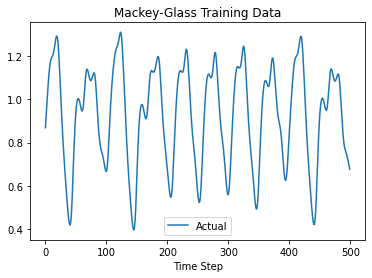

In [49]:
#Generate Data
trainsize = 2000
testsize = 2000

# generate train/test signals
y = (np.array(mg17(trainsize+testsize+100))).reshape(-1,1)
#Transform
transformedY = np.tanh(y-1)
trainin = transformedY[:trainsize,:]
testin = y[trainsize:,:]

z = np.arange(0, 500)
fig, ax = plt.subplots()
ax.plot(z, y[0:500,0], label='Actual')
ax.set(xlabel='Time Step',
       title='Mackey-Glass Training Data')
ax.legend()

#### Trial vs Recreated

In [6]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

for i in range(0,10):
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

    seed = studies.iloc[i,2].user_attrs['seed']
    
    model.generateW(seed)
    model.generateWin(seed)
    model.generateWfb(seed)

    model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

    predicted = model.run(input_u=None, time=testin.shape[0])
    transformed = np.arctan(predicted) + 1

    rmse0, mae0, r20 = getScores(testin, transformed)
    print(studies.iloc[i,0])
    print("RMSE: " + str(studies.iloc[i,2].user_attrs['rmse']) + ", " + str(rmse0))
    print("MAE: " + str(studies.iloc[i,2].user_attrs['MAE']) + ", " + str(mae0))
    print("R2: " + str(studies.iloc[i,2].user_attrs['R2']) + ", " + str(r20) + "\n")

study_247B
RMSE: 0.11609737834460455, 0.11609737834460455
MAE: 0.07767714939539996, 0.07767714939539996
R2: 0.7624456126890172, 0.7624456126890172

study_847B
RMSE: 0.11941491019223151, 0.11941491019223151
MAE: 0.06552056488029658, 0.06552056488029658
R2: 0.7486752016672368, 0.7486752016672368

study_8569
RMSE: 0.12060282435531162, 0.12060282435531162
MAE: 0.06823117159862853, 0.06823117159862853
R2: 0.7436500795219091, 0.7436500795219091

study_247A
RMSE: 0.12364180140221688, 0.12364180140221688
MAE: 0.0696904884978176, 0.0696904884978176
R2: 0.7305681842984904, 0.7305681842984904

study_246B
RMSE: 0.12410445521749543, 0.12410445521749543
MAE: 0.07089981269496849, 0.07089981269496849
R2: 0.7285480442469983, 0.7285480442469983

study_846B
RMSE: 0.1280440833109955, 0.1280440833109955
MAE: 0.0825754531983031, 0.0825754531983031
R2: 0.7110403113983736, 0.7110403113983736

study_8469
RMSE: 0.13758566639286093, 0.13758566639286093
MAE: 0.08571536921153952, 0.08571536921153952
R2: 0.66637037

# Questions to Answer:
### How Does Model Accuracy Change as We Increase the Number of Neurons, N?
### Which reservoir activation function is the best?
### Is there an overwhelming difference in how the distribution type changes the model?
### Which connections within the reservoir give the best setup for this pattern generation task?
### None of the models which ranked well used a tanh output activation: discuss.
### Time complexity of different model instantiations

# How Does Model Accuracy Change as We Increase the Number of Neurons, N?

In [7]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,551,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
scores = np.zeros((15,2))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()
for i in range(0,studies.shape[0]): #pick a model
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)

            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1

            rmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = rmse0
            scores[k,1] = r20
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        
        max_deviations = 2.5
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 100 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[studies.iloc[i,0]])), axis=1)

/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:521: RuntimeWarning: underflow encountered in multiply
  x = (1 - self.a) * x + secondTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (1)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (1)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (1)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad genera

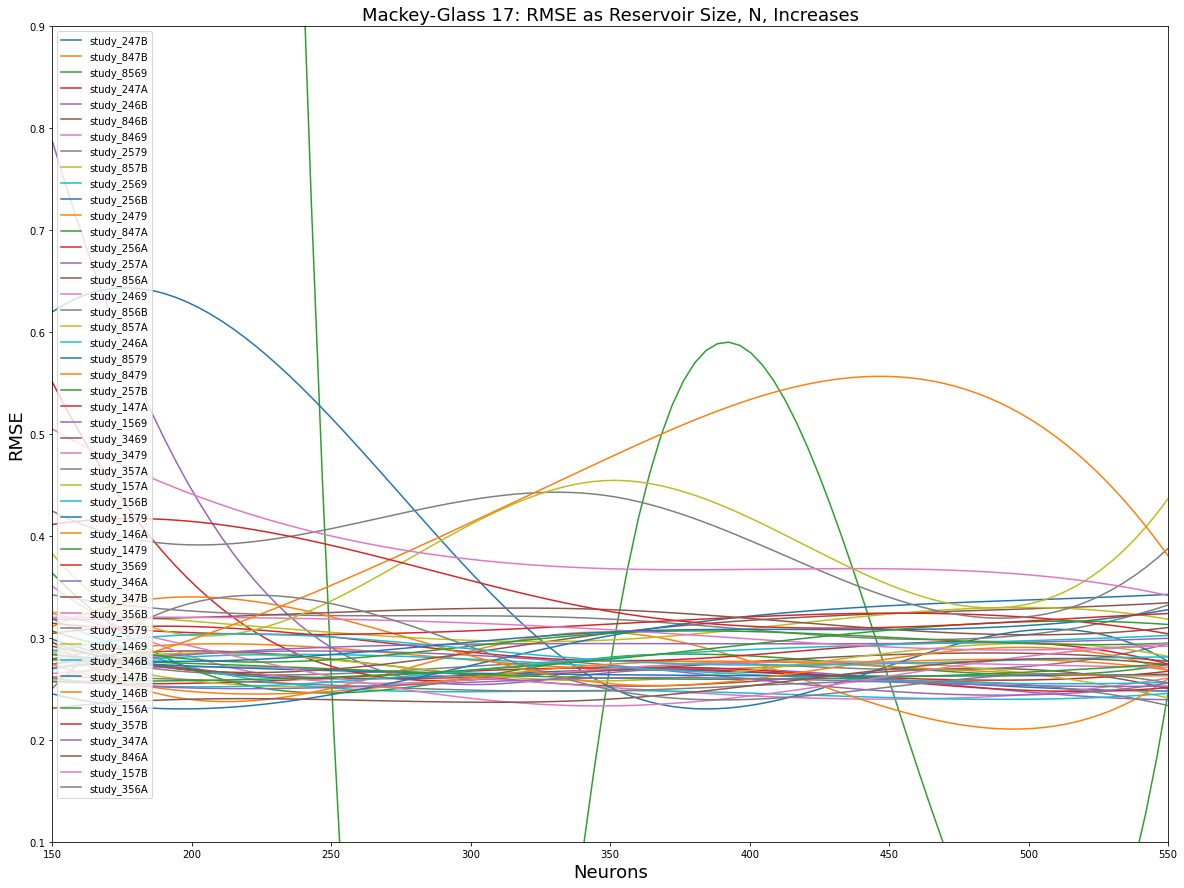

In [926]:
#add to plot
x = np.arange(50,551,inc) #Number of Neurons
plt.figure(figsize=(20, 15))
for col in range(0,plotInfo3.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo3.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3.columns[col])

plt.legend()
plt.xlim([150,550])
plt.ylim([0.1,0.9])
plt.title('Mackey-Glass 17: RMSE as Reservoir Size, N, Increases', fontsize=18)
plt.xlabel('Neurons', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
plt.show()

In [47]:
#Cleanup the plot
pd.set_option('display.max_columns', None)
plotInfo3.iloc[:,:]

study_247B  study_847B  study_8569  study_247A  study_246B  study_846B  \
0    0.294689    0.403314   40.194244    0.287514    0.758408   40.166008   
1    0.298719    0.279590   20.218063    0.257232    0.787892    0.274218   
2    0.259930    0.290001    0.261939    0.260720    0.290738    0.279181   
3    0.268458    0.269489    0.274214    0.270669    0.265991    0.253029   
4    0.259287    0.276569    0.258199    0.260836    0.259871    0.267051   
5    0.247934    0.268527    0.246677    0.267329    0.239414    0.249994   

   study_8469  study_2579  study_857B  study_2569  study_256B  study_2479  \
0   33.581193    0.533236    0.567909    0.647910    0.909722    0.489657   
1    0.265092    0.288266    0.285972    0.318779    0.619839    0.296651   
2    0.269066    0.264688    0.252157    0.250999    0.515981    0.250655   
3    0.251424    0.277835    0.269796    0.248415    0.251685    0.305490   
4    0.239948    0.269137    0.275963    0.241498    0.272716    0.231164   
5    0.260651    0.294382    0.241124    0.245662    0.276871    0.260057   

   study_847A  study_256A  study_257A  study_856A  study_2469  study_856B  \
0    0.306578    0.806199    0.307297   40.188694    0.561331   60.168307   
1    0.363604    0.551243    0.274367    0.291843    0.350663    0.261801   
2    0.246019    0.272221    0.287140    0.260693    0.256978    0.253610   
3    0.281128    0.269625    0.273302    0.268041    0.269876    0.248193   
4    0.271659    0.258048    0.247681    0.283480    0.276053    0.257730   
5    0.274030    0.251375    0.255707    0.277066    0.271340    0.233710   

   study_857A  study_246A  study_8579  study_8479  study_257B  study_147A  \
0    0.655524    0.634813    0.501666    0.485832    0.436420    0.290759   
1    0.270065    0.269659    0.279687    0.274115    0.278454    0.304463   
2    0.278479    0.283642    0.267939    0.247564    0.269760    0.301127   
3    0.257927    0.271678    0.263938    0.274233    0.260578    0.277567   
4    0.285235    0.258187    0.262587    0.271923    0.261490    0.293719   
5    0.281849    0.256416    0.264379    0.262995    0.274669    0.274382   

   study_1569  study_3469  study_3479  study_357A  study_157A  study_156B  \
0    0.247983   20.222600    0.319251    0.408921    0.307505    0.278444   
1    0.270545    0.295351    0.324021    0.342257    0.325202    0.260559   
2    0.290981    0.269226    0.262167    0.321955    0.305509    0.256691   
3    0.294466    0.304697    0.233339    0.318486    0.298036    0.280515   
4    0.294488    0.324025    0.262566    0.299151    0.323404    0.293455   
5    0.299655    0.334493    0.291971    0.332339    0.318289    0.302502   

   study_1579  study_146A  study_1479  study_3569  study_346A  study_347B  \
0    0.246881    0.276276    0.289433    0.306755   80.310564    0.325981   
1    0.245147    0.311089    0.306859    0.314419   73.420188    0.318367   
2    0.244369    0.320816    0.278734    0.303465  100.000000    0.324928   
3    0.302271    0.255125    0.304597    0.313618  100.000000    0.327755   
4    0.331605    0.279532    0.300581    0.324299  100.000000    0.308520   
5    0.342756    0.268091    0.294957    0.304080  100.000000    0.310191   

   study_356B  study_3579  study_1469  study_346B  study_147B  study_146B  \
0    0.370602    0.406086    0.320522    0.280196    0.263098    0.244024   
1    0.320156    0.424527    0.382661    0.287233    0.283687    0.259977   
2    0.318541    0.407245    0.336331    0.300857    0.283709    0.351634   
3    0.308013    0.439149    0.454569    0.277812    0.305880    0.477280   
4    0.291110    0.339881    0.352192    0.274811    0.308215    0.556558   
5    0.294601    0.387801    0.436839    0.281411    0.327707    0.380341   

   study_156A  study_357B  study_347A  study_846A  study_157B  study_356A  
0    0.253420    0.306999    0.282149    0.243381    0.632234    0.245940  
1    0.257379    0.411285    0.260371    0.231064    0.504997    0.2504

In [52]:
temp = pd.DataFrame.transpose(plotInfo3)
temp = temp.sort_values(by=5, ascending = True)
pd.DataFrame.transpose(temp)

study_856B  study_246B  study_857B  study_2569  study_8569  study_247B  \
0   60.168307    0.758408    0.567909    0.647910   40.194244    0.294689   
1    0.261801    0.787892    0.285972    0.318779   20.218063    0.298719   
2    0.253610    0.290738    0.252157    0.250999    0.261939    0.259930   
3    0.248193    0.265991    0.269796    0.248415    0.274214    0.268458   
4    0.257730    0.259871    0.275963    0.241498    0.258199    0.259287   
5    0.233710    0.239414    0.241124    0.245662    0.246677    0.247934   

   study_846B  study_256A  study_347A  study_257A  study_356A  study_246A  \
0   40.166008    0.806199    0.282149    0.307297    0.245940    0.634813   
1    0.274218    0.551243    0.260371    0.274367    0.250463    0.269659   
2    0.279181    0.272221    0.251422    0.287140    0.333724    0.283642   
3    0.253029    0.269625    0.260745    0.273302    0.249331    0.271678   
4    0.267051    0.258048    0.256730    0.247681    0.251789    0.258187   
5    0.249994    0.251375    0.252838    0.255707    0.255760    0.256416   

   study_2479  study_8469  study_8479  study_8579  study_247A  study_146A  \
0    0.489657   33.581193    0.485832    0.501666    0.287514    0.276276   
1    0.296651    0.265092    0.274115    0.279687    0.257232    0.311089   
2    0.250655    0.269066    0.247564    0.267939    0.260720    0.320816   
3    0.305490    0.251424    0.274233    0.263938    0.270669    0.255125   
4    0.231164    0.239948    0.271923    0.262587    0.260836    0.279532   
5    0.260057    0.260651    0.262995    0.264379    0.267329    0.268091   

   study_847B  study_2469  study_846A  study_847A  study_147A  study_257B  \
0    0.403314    0.561331    0.243381    0.306578    0.290759    0.436420   
1    0.279590    0.350663    0.231064    0.363604    0.304463    0.278454   
2    0.290001    0.256978    0.239430    0.246019    0.301127    0.269760   
3    0.269489    0.269876    0.239965    0.281128    0.277567    0.260578   
4    0.276569    0.276053    0.269339    0.271659    0.293719    0.261490   
5    0.268527    0.271340    0.273503    0.274030    0.274382    0.274669   

   study_256B  study_856A  study_346B  study_857A  study_3479  study_2579  \
0    0.909722   40.188694    0.280196    0.655524    0.319251    0.533236   
1    0.619839    0.291843    0.287233    0.270065    0.324021    0.288266   
2    0.515981    0.260693    0.300857    0.278479    0.262167    0.264688   
3    0.251685    0.268041    0.277812    0.257927    0.233339    0.277835   
4    0.272716    0.283480    0.274811    0.285235    0.262566    0.269137   
5    0.276871    0.277066    0.281411    0.281849    0.291971    0.294382   

   study_356B  study_1479  study_1569  study_156B  study_3569  study_347B  \
0    0.370602    0.289433    0.247983    0.278444    0.306755    0.325981   
1    0.320156    0.306859    0.270545    0.260559    0.314419    0.318367   
2    0.318541    0.278734    0.290981    0.256691    0.303465    0.324928   
3    0.308013    0.304597    0.294466    0.280515    0.313618    0.327755   
4    0.291110    0.300581    0.294488    0.293455    0.324299    0.308520   
5    0.294601    0.294957    0.299655    0.302502    0.304080    0.310191   

   study_156A  study_157A  study_357B  study_147B  study_357A  study_3469  \
0    0.253420    0.307505    0.306999    0.263098    0.408921   20.222600   
1    0.257379    0.325202    0.411285    0.283687    0.342257    0.295351   
2    0.261677    0.305509    0.390878    0.283709    0.321955    0.269226   
3    0.279269    0.298036    0.325933    0.305880    0.318486    0.304697   
4    0.307719    0.323404    0.310422    0.308215    0.299151    0.324025   
5    0.313176    0.318289    0.323974    0.327707    0.332339    0.334493   

   study_157B  study_1579  study_146B  study_3579  study_1469  study_346A  
0    0.632234    0.246881    0.244024    0.406086    0.320522   80.310564  
1    0.504997    0.245147    0.259977    0.424527    0.382661   73.4201

In [159]:
temp = pd.DataFrame.transpose(plotInfo3)
temp = temp.sort_values(by=0, ascending = True)
plotInfo3 = pd.DataFrame.transpose(temp)
plotInfo3

study_846A  study_146B  study_356A  study_1579  study_1569  study_156A  \
0    0.243381    0.244024    0.245940    0.246881    0.247983    0.253420   
1    0.231064    0.259977    0.250463    0.245147    0.270545    0.257379   
2    0.239430    0.351634    0.333724    0.244369    0.290981    0.261677   
3    0.239965    0.477280    0.249331    0.302271    0.294466    0.279269   
4    0.269339    0.556558    0.251789    0.331605    0.294488    0.307719   
5    0.273503    0.380341    0.255760    0.342756    0.299655    0.313176   

   study_147B  study_146A  study_156B  study_346B  study_347A  study_247A  \
0    0.263098    0.276276    0.278444    0.280196    0.282149    0.287514   
1    0.283687    0.311089    0.260559    0.287233    0.260371    0.257232   
2    0.283709    0.320816    0.256691    0.300857    0.251422    0.260720   
3    0.305880    0.255125    0.280515    0.277812    0.260745    0.270669   
4    0.308215    0.279532    0.293455    0.274811    0.256730    0.260836   
5    0.327707    0.268091    0.302502    0.281411    0.252838    0.267329   

   study_1479  study_147A  study_247B  study_847A  study_3569  study_357B  \
0    0.289433    0.290759    0.294689    0.306578    0.306755    0.306999   
1    0.306859    0.304463    0.298719    0.363604    0.314419    0.411285   
2    0.278734    0.301127    0.259930    0.246019    0.303465    0.390878   
3    0.304597    0.277567    0.268458    0.281128    0.313618    0.325933   
4    0.300581    0.293719    0.259287    0.271659    0.324299    0.310422   
5    0.294957    0.274382    0.247934    0.274030    0.304080    0.323974   

   study_257A  study_157A  study_3479  study_1469  study_347B  study_356B  \
0    0.307297    0.307505    0.319251    0.320522    0.325981    0.370602   
1    0.274367    0.325202    0.324021    0.382661    0.318367    0.320156   
2    0.287140    0.305509    0.262167    0.336331    0.324928    0.318541   
3    0.273302    0.298036    0.233339    0.454569    0.327755    0.308013   
4    0.247681    0.323404    0.262566    0.352192    0.308520    0.291110   
5    0.255707    0.318289    0.291971    0.436839    0.310191    0.294601   

   study_847B  study_3579  study_357A  study_257B  study_8479  study_2479  \
0    0.403314    0.406086    0.408921    0.436420    0.485832    0.489657   
1    0.279590    0.424527    0.342257    0.278454    0.274115    0.296651   
2    0.290001    0.407245    0.321955    0.269760    0.247564    0.250655   
3    0.269489    0.439149    0.318486    0.260578    0.274233    0.305490   
4    0.276569    0.339881    0.299151    0.261490    0.271923    0.231164   
5    0.268527    0.387801    0.332339    0.274669    0.262995    0.260057   

   study_8579  study_2579  study_2469  study_857B  study_157B  study_246A  \
0    0.501666    0.533236    0.561331    0.567909    0.632234    0.634813   
1    0.279687    0.288266    0.350663    0.285972    0.504997    0.269659   
2    0.267939    0.264688    0.256978    0.252157    0.400033    0.283642   
3    0.263938    0.277835    0.269876    0.269796    0.367918    0.271678   
4    0.262587    0.269137    0.276053    0.275963    0.367832    0.258187   
5    0.264379    0.294382    0.271340    0.241124    0.341625    0.256416   

   study_2569  study_857A  study_246B  study_256A  study_256B  study_3469  \
0    0.647910    0.655524    0.758408    0.806199    0.909722   20.222600   
1    0.318779    0.270065    0.787892    0.551243    0.619839    0.295351   
2    0.250999    0.278479    0.290738    0.272221    0.515981    0.269226   
3    0.248415    0.257927    0.265991    0.269625    0.251685    0.304697   
4    0.241498    0.285235    0.259871    0.258048    0.272716    0.324025   
5    0.245662    0.281849    0.239414    0.251375    0.276871    0.334493   

   study_8469  study_846B  study_856A  study_8569  study_856B  study_346A  
0   33.581193   40.166008   40.188694   40.194244   60.168307   80.310564  
1    0.265092    0.274218    0.291843   20.218063    0.261801   73.4201

In [16]:
plotInfo3_10 = pd.DataFrame()
bestStudies = ['study_247B', 'study_847B', 'study_8569', 'study_247A', 'study_246B', 'study_846B', 'study_8469', 'study_2579', 'study_857B', 'study_2569']
for i in bestStudies:
    plotInfo3_10 = pd.concat([plotInfo3_10, plotInfo3[[i]]], axis=1)
plotInfo3_10 = plotInfo3_10.reset_index(drop=True)
plotInfo3_10

study_247B  study_847B  study_8569  study_247A  study_246B  study_846B  \
0    0.294689    0.403314   40.194244    0.287514    0.758408   40.166008   
1    0.298719    0.279590   20.218063    0.257232    0.787892    0.274218   
2    0.259930    0.290001    0.261939    0.260720    0.290738    0.279181   
3    0.268458    0.269489    0.274214    0.270669    0.265991    0.253029   
4    0.259287    0.276569    0.258199    0.260836    0.259871    0.267051   
5    0.247934    0.268527    0.246677    0.267329    0.239414    0.249994   

   study_8469  study_2579  study_857B  study_2569  
0   33.581193    0.533236    0.567909    0.647910  
1    0.265092    0.288266    0.285972    0.318779  
2    0.269066    0.264688    0.252157    0.250999  
3    0.251424    0.277835    0.269796    0.248415  
4    0.239948    0.269137    0.275963    0.241498  
5    0.260651    0.294382    0.241124    0.245662

# Time Complexity

In [28]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1550,inc) #Number of Neurons
y = np.zeros((15,1))
z = np.zeros((15,1))
w = np.zeros((15,1))
n = np.zeros((15,1))
scores = np.zeros((15,2))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo3_10 = pd.DataFrame()
plotInfo30 = pd.DataFrame()
plotInfo3TimeTrain = pd.DataFrame()
plotInfo3TimePredict = pd.DataFrame()
for i in range(0,10): #pick a model
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,15):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 100 neurons
    plotInfo3_10 = pd.concat((plotInfo3_10, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimeTrain = pd.concat((plotInfo3TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimePredict = pd.concat((plotInfo3TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:521: RuntimeWarning: underflow encountered in multiply
  x = (1 - self.a) * x + secondTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3341: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3342: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


In [32]:
plotInfo3_10

study_247B  study_847B  study_8569  study_247A  study_246B  study_846B  \
0     0.294689    0.403314   40.194244    0.281604    0.758408   40.166008   
1     0.267808    0.279590   20.218063    0.257232    0.787892    0.278993   
2     0.267210    0.287895    0.261939    0.260720    0.264522    0.283959   
3     0.273926    0.275115    0.274702    0.270955    0.271077    0.253029   
4     0.264534    0.288411    0.258199    0.260836    0.265878    0.267051   
5     0.247934    0.281241    0.246677    0.273434    0.245902    0.256997   
6     0.258034    0.283535    0.264571    0.273467    0.260269    0.261230   
7     0.259052    0.276542    0.237542    0.254682    0.263993    0.262129   
8     0.270526    0.284271    0.256045    0.275759    0.257294    0.275287   
9     0.253494    0.287197    0.238679    0.258231    0.256057    0.269941   
10    0.263458    0.278873    0.268515    0.268925    0.248963    0.255132   
11    0.273470    0.291626    0.262949    0.269705    0.254863    0.250679   
12    0.237190    0.277722    0.264594    0.271609    0.242609    0.264895   
13    0.255785    0.253077    0.253511    0.259982    0.229158    0.252147   
14    0.257607    0.259547    0.251187    0.263064    0.253116    0.262319   

    study_8469  study_2579  study_857B  study_2569  
0    33.581193    0.533236    0.567909    0.647910  
1     0.265092    0.288266    0.280090    0.318779  
2     0.274648    0.264688    0.252157    0.250999  
3     0.256171    0.283828    0.277167    0.255659  
4     0.239948    0.275540    0.275963    0.241498  
5     0.260651    0.298693    0.241124    0.253429  
6     0.242173    0.286499    0.237616    0.255338  
7     0.245216    0.261066    0.273094    0.253448  
8     0.254371    0.268237    0.264572    0.226685  
9     0.240381    0.268428    0.283155    0.225746  
10    0.252249    0.264533    0.261315    0.253819  
11    0.254117    0.270665    0.273387    0.240636  
12    0.247038    0.287102    0.241780    0.248783  
13    0.234903    0.278239    0.251181    0.235790  
14    0.236909    0.255109    0.273008    0.242744

In [39]:
backup = plotInfo3_10

In [43]:
#cleaning up outliers to make plot cleaner
plotInfo3_10.iloc[0,2] = 1
plotInfo3_10.iloc[0,5] = 1
plotInfo3_10.iloc[0,6] = 1
plotInfo3_10.iloc[1,2] = 1

In [44]:
plotInfo3_10

study_247B  study_847B  study_8569  study_247A  study_246B  study_846B  \
0     0.294689    0.403314    1.000000    0.281604    0.758408    1.000000   
1     0.267808    0.279590    1.000000    0.257232    0.787892    0.278993   
2     0.267210    0.287895    0.261939    0.260720    0.264522    0.283959   
3     0.273926    0.275115    0.274702    0.270955    0.271077    0.253029   
4     0.264534    0.288411    0.258199    0.260836    0.265878    0.267051   
5     0.247934    0.281241    0.246677    0.273434    0.245902    0.256997   
6     0.258034    0.283535    0.264571    0.273467    0.260269    0.261230   
7     0.259052    0.276542    0.237542    0.254682    0.263993    0.262129   
8     0.270526    0.284271    0.256045    0.275759    0.257294    0.275287   
9     0.253494    0.287197    0.238679    0.258231    0.256057    0.269941   
10    0.263458    0.278873    0.268515    0.268925    0.248963    0.255132   
11    0.273470    0.291626    0.262949    0.269705    0.254863    0.250679   
12    0.237190    0.277722    0.264594    0.271609    0.242609    0.264895   
13    0.255785    0.253077    0.253511    0.259982    0.229158    0.252147   
14    0.257607    0.259547    0.251187    0.263064    0.253116    0.262319   

    study_8469  study_2579  study_857B  study_2569  
0     1.000000    0.533236    0.567909    0.647910  
1     0.265092    0.288266    0.280090    0.318779  
2     0.274648    0.264688    0.252157    0.250999  
3     0.256171    0.283828    0.277167    0.255659  
4     0.239948    0.275540    0.275963    0.241498  
5     0.260651    0.298693    0.241124    0.253429  
6     0.242173    0.286499    0.237616    0.255338  
7     0.245216    0.261066    0.273094    0.253448  
8     0.254371    0.268237    0.264572    0.226685  
9     0.240381    0.268428    0.283155    0.225746  
10    0.252249    0.264533    0.261315    0.253819  
11    0.254117    0.270665    0.273387    0.240636  
12    0.247038    0.287102    0.241780    0.248783  
13    0.234903    0.278239    0.251181    0.235790  
14    0.236909    0.255109    0.273008    0.242744

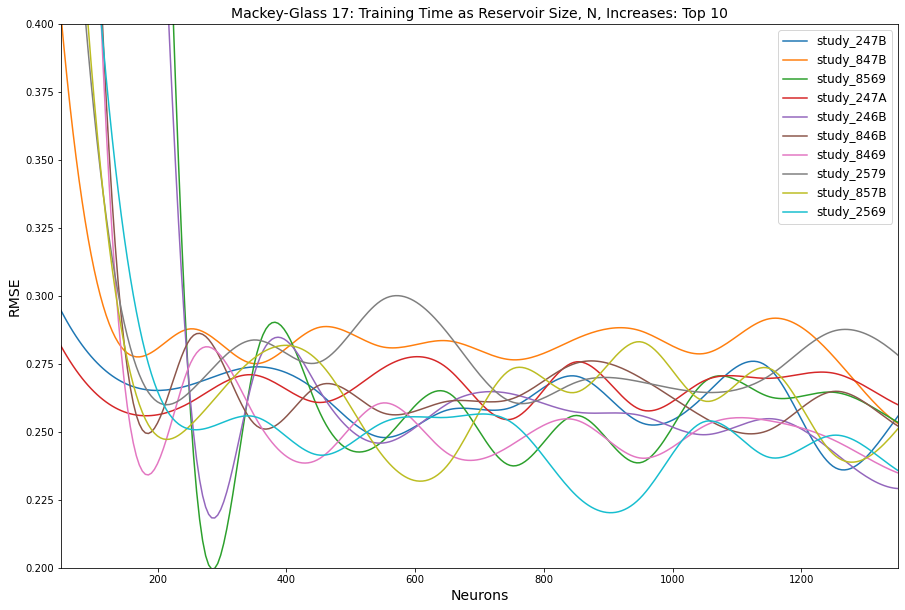

In [928]:
#add to plot
x = np.arange(50,1550,inc) #Number of Neurons
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3_10.shape[1]):
    X_Y_Spline = make_interp_spline(x[:], plotInfo3_10.iloc[:,col])
    X_ = np.linspace(x[:].min(), x[:].max(), 300)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3_10.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1350])
plt.ylim([0.2,0.4])
plt.title('Mackey-Glass 17: Training Time as Reservoir Size, N, Increases: Top 10', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.show()

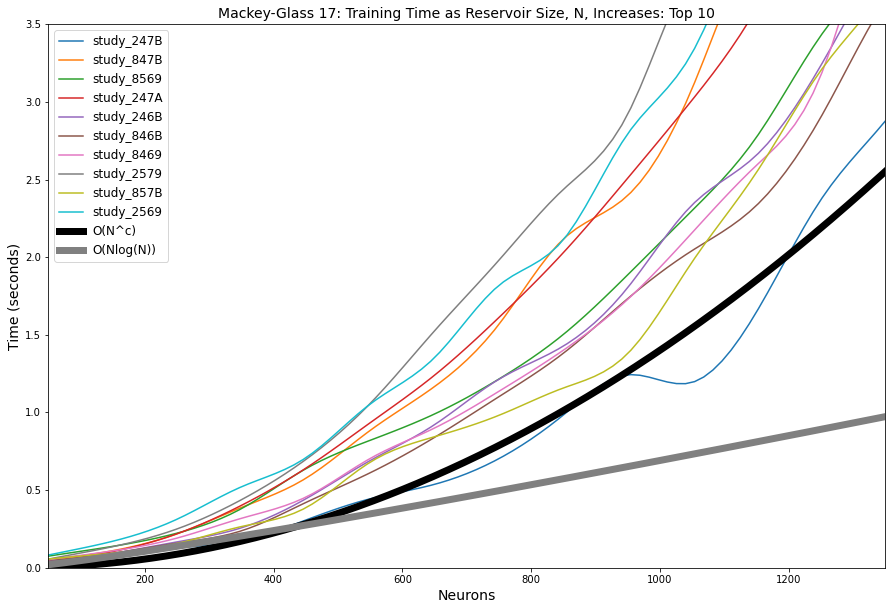

In [352]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3TimeTrain.columns[col])
    
n = np.arange(1,1550)
exponential = 0.0000014*np.power(n,2)
nlogn = 0.0001*n*np.log(n)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)
plt.plot(n,nlogn,label='O(Nlog(N))', color='#808080', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1350])
plt.ylim([0,3.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Training Time as Reservoir Size, N, Increases: Top 10', fontsize=14)
plt.show()

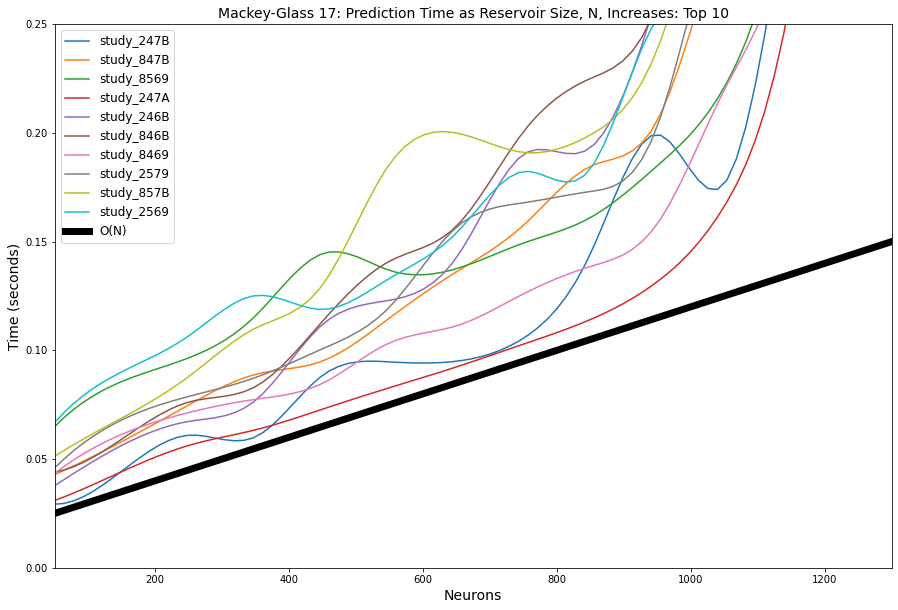

In [51]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3TimePredict.columns[col])
    
n = np.arange(1,1350)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1300])
plt.ylim([0,0.25])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Prediction Time as Reservoir Size, N, Increases: Top 10', fontsize=14)
plt.show()

In [824]:
plotInfo3TimePredict

study_856A  study_8569  study_3469  study_356B  study_1469  study_847A  \
0    0.059475    0.054676    0.035379    0.054724    0.037618    0.039622   
1    0.095634    0.088943    0.066919    0.090177    0.064868    0.066007   
2    0.122740    0.119817    0.093791    0.117420    0.090414    0.091635   
3    0.162381    0.161306    0.124925    0.156438    0.122809    0.130268   
4    0.252891    0.248650    0.207319    0.243048    0.195552    0.200799   
5    0.636296    0.655446    0.583617    0.615780    0.562720    0.573702   

   study_146A  study_257A  study_3569  study_847B  
0    0.038444    0.049814    0.053946    0.039397  
1    0.067219    0.082296    0.089705    0.068768  
2    0.090223    0.114324    0.118125    0.092688  
3    0.122724    0.156496    0.165511    0.137252  
4    0.196760    0.227046    0.237659    0.204771  
5    0.562883    0.602626    0.615870    0.502411

In [367]:
for i in range(0,10):
    print(studies.iloc[i,0])
    print(studies.iloc[i,2].params)
    print('\n')


study_247B
{'p': 0.8378701033963081, 'a': 0.20031343625871822, 'dw': 0.17069864486608977, 'dfb': 0.5003661645248476, 'din': 0.2543342079553447, 'sin': 0.4982596731051697, 'sfb': 1.578269374846836, 'B': 5.619218425978607e-09}


study_847B
{'p': 0.9708948906272473, 'a': 0.15039080584579087, 'dw': 0.9605901234048185, 'dfb': 0.937175531766395, 'din': 0.3784395088466854, 'sin': 1.6152428967687134, 'sfb': 1.0305281801595199, 'B': 1.1542014126201684e-07}


study_8569
{'p': 0.9980554569012807, 'a': 0.41641513679220377, 'dw': 0.23112906358902408, 'dfb': 0.2167551547403958, 'din': 0.7850519472884833, 'sin': 0.9251887269200184, 'sfb': 0.5428966394704486, 'B': 1.8170686713869564e-08}


study_247A
{'p': 0.7571975830690131, 'a': 0.13236744745252335, 'dw': 0.9741341626544963, 'dfb': 0.42257143743633196, 'din': 0.05160499812227359, 'sin': 0.5100716295102906, 'sfb': 1.8729564976753874, 'B': 5.7123355007507225e-08}


study_246B
{'p': 0.9170293562318912, 'a': 0.3975779472084435, 'dw': 0.30288033876745935

# Which reservoir activation function is the best?

## Models that scored very similar, but used different activation function

In [57]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
w = np.zeros((11,1))
n = np.zeros((11,1))
z = np.zeros((11,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo0 = pd.DataFrame()
plotInfo0TimeTrain = pd.DataFrame()
plotInfo0TimePredict = pd.DataFrame()
for c in range(0,2): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_857B'].index[0]
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)
            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo0 = pd.concat((plotInfo0, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo0TimeTrain = pd.concat((plotInfo0TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo0TimePredict = pd.concat((plotInfo0TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

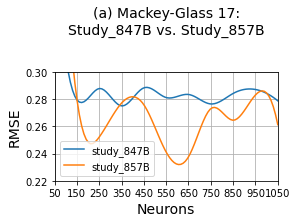

In [601]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.title('(a) Mackey-Glass 17:\nStudy_847B vs. Study_857B\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.22,0.3])
plt.grid()
plt.show()

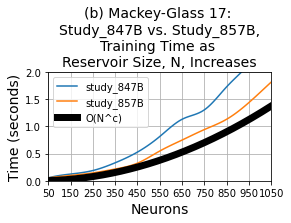

In [602]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey-Glass 17: \nStudy_847B vs. Study_857B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

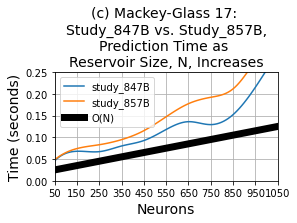

In [603]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.25])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17: \nStudy_847B vs. Study_857B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## Same exact model with different activation function

In [598]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo1 = pd.DataFrame()
count = 1

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo1TimeTrain = pd.DataFrame()
plotInfo1TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo1 = pd.concat((plotInfo1, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo1TimeTrain = pd.concat((plotInfo1TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo1TimePredict = pd.concat((plotInfo1TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [599]:
plotInfo1 = plotInfo1.rename(columns={"1": "study_847B", "2": "study_857B"})
plotInfo1TimeTrain = plotInfo1TimeTrain.rename(columns={"1": "study_847B", "2": "study_857B"})
plotInfo1TimePredict = plotInfo1TimePredict.rename(columns={"1": "study_847B", "2": "study_857B"})

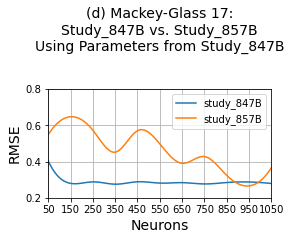

In [610]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.2,0.8])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(d) Mackey-Glass 17:\nStudy_847B vs. Study_857B\nUsing Parameters from Study_847B\n\n', fontsize = 14)
plt.show()

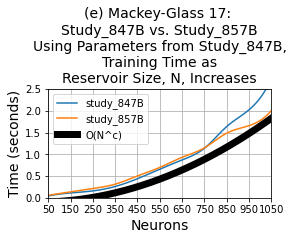

In [617]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000175*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2.5])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) Mackey-Glass 17: \nStudy_847B vs. Study_857B\nUsing Parameters from Study_847B,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

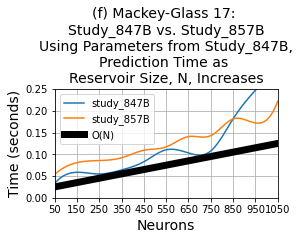

In [605]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.25])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Mackey-Glass 17: \nStudy_847B vs. Study_857B\nUsing Parameters from Study_847B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [66]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo2 = pd.DataFrame()
count = 1

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
z = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo2TimeTrain = pd.DataFrame()
plotInfo2TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_857B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo2 = pd.concat((plotInfo2, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo2TimeTrain = pd.concat((plotInfo2TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo2TimePredict = pd.concat((plotInfo2TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [67]:
plotInfo2 = plotInfo2.rename(columns={"1": "study_847B", "2": "study_857B"})
plotInfo2TimeTrain = plotInfo2TimeTrain.rename(columns={"1": "study_847B", "2": "study_857B"})
plotInfo2TimePredict = plotInfo2TimePredict.rename(columns={"1": "study_847B", "2": "study_857B"})

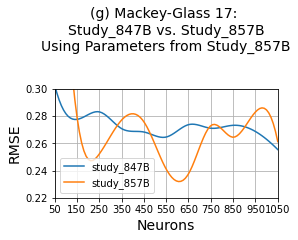

In [618]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.22,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(g) Mackey-Glass 17: \nStudy_847B vs. Study_857B\nUsing Parameters from Study_857B\n\n', fontsize=14)
plt.show()

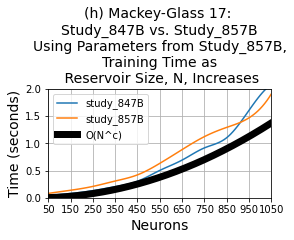

In [607]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Mackey-Glass 17: \nStudy_847B vs. Study_857B\nUsing Parameters from Study_857B,\nTraining Time as\n Reservoir Size, N, Increases', fontsize=14)
plt.show()

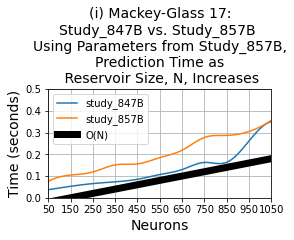

In [623]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0002*n)-0.03
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Mackey-Glass 17:\nStudy_847B vs. Study_857B \nUsing Parameters from Study_857B,\nPrediction Time as\n Reservoir Size, N, Increases', fontsize=14)
plt.show()

## What parameters are controlling the influence of the reservoir activation

### spectral radius

In [90]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo22= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo22TimeTrain = pd.DataFrame()
plotInfo22TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
N = 50
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_857B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo22 =            pd.concat((plotInfo22, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo22TimeTrain =   pd.concat((plotInfo22TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo22TimePredict = pd.concat((plotInfo22TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_847B
study_857B


In [91]:
plotInfo22 =            plotInfo22.rename(columns={"0": "study_847B SR", "1": "study_857B SR"})
plotInfo22TimeTrain =   plotInfo22TimeTrain.rename(columns={"0": "study_847B SR", "1": "study_857B SR"})
plotInfo22TimePredict = plotInfo22TimePredict.rename(columns={"0": "study_847B SR", "1": "study_857B SR"})

In [369]:
x = np.arange(50,1051,inc) #Number of Neurons

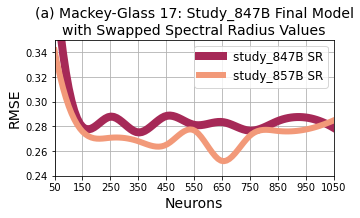

In [372]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo22.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo22.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo22.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Mackey-Glass 17: Study_847B Final Model\nwith Swapped Spectral Radius Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.24,0.35])
plt.grid()
plt.show()

In [93]:
plotInfo22.iloc[9,0]-plotInfo22.iloc[9,1]

0.009750676385280932

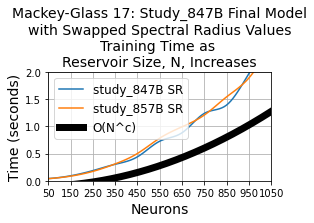

In [94]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo22TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo22TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo22TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Study_847B Final Model\nwith Swapped Spectral Radius Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

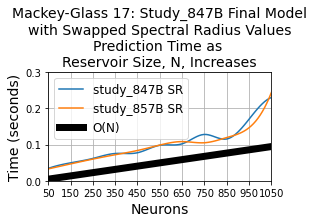

In [95]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo22TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo22TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo22TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: Study_847B Final Model\nwith Swapped Spectral Radius Values\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [843]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo23= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo23TimeTrain = pd.DataFrame()
plotInfo23TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_857B'].index[0]
    
    print(studies.iloc[i,0])
    a = studies.iloc[i,2].params['a']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo23 =            pd.concat((plotInfo23, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo23TimeTrain =   pd.concat((plotInfo23TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo23TimePredict = pd.concat((plotInfo23TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_847B
0.04190831184387207
0.08895550455365862
0.16814376626695907
0.28276738098689486
0.41881869389460635
0.7374884532048152
0.7871605157852173
1.0511763777051653
1.465122870036534
1.861743347985404
2.1376267671585083
study_857B
0.037043190002441405
0.08457159996032715
0.15940581835233247
0.25585007667541504
0.4354393005371094
0.6928451231547764
0.8756658520017352
1.168120162827628
1.5035250981648762
1.8625009230204992
2.2873561749091516


In [844]:
plotInfo23 =            plotInfo23.rename(columns={"0": "study_847B LR", "1": "study_857B LR"})
plotInfo23TimeTrain =   plotInfo23TimeTrain.rename(columns={"0": "study_847B LR", "1": "study_857B LR"})
plotInfo23TimePredict = plotInfo23TimePredict.rename(columns={"0": "study_847B LR", "1": "study_857B LR"})

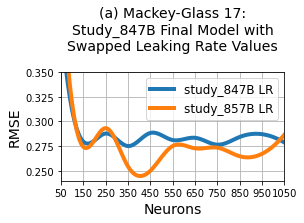

In [845]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo23.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23.columns[col], linewidth=4)
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Mackey-Glass 17:\nStudy_847B Final Model with\nSwapped Leaking Rate Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.24,0.35])
plt.grid()
plt.show()

In [846]:
plotInfo23.iloc[9,1]-plotInfo23.iloc[9,0]

-0.019973600704493055

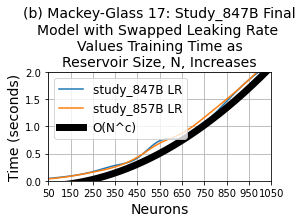

In [847]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo23TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000002*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey-Glass 17: Study_847B Final\nModel with Swapped Leaking Rate \nValues Training Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

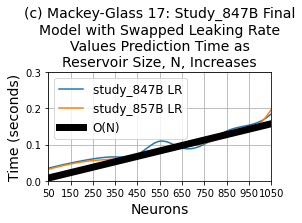

In [848]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo23TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00015*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17: Study_847B Final\nModel with Swapped Leaking Rate\nValues Prediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [870]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo24= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo24TimeTrain = pd.DataFrame()
plotInfo24TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_857B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo24 =            pd.concat((plotInfo24, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo24TimeTrain =   pd.concat((plotInfo24TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo24TimePredict = pd.concat((plotInfo24TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_847B
study_857B


In [871]:
plotInfo24 =            plotInfo24.rename(columns={"0": "study_847B dW", "1": "study_857B dW"})
plotInfo24TimeTrain =   plotInfo24TimeTrain.rename(columns={"0": "study_847B dW", "1": "study_857B dW"})
plotInfo24TimePredict = plotInfo24TimePredict.rename(columns={"0": "study_847B dW", "1": "study_857B dW"})

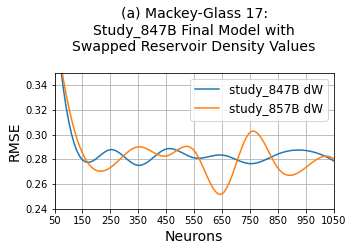

In [872]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo24.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo24.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo24.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Mackey-Glass 17:\nStudy_847B Final Model with\nSwapped Reservoir Density Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.24,0.35])
plt.grid()
plt.show()

In [873]:
plotInfo24.iloc[9,0]-plotInfo24.iloc[9,1]

0.013852278162542142

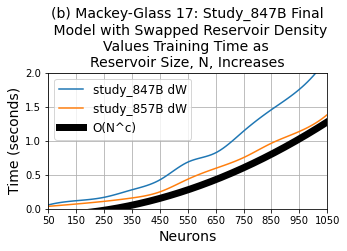

In [874]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo24TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo24TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo24TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey-Glass 17: Study_847B Final\n Model with Swapped Reservoir Density\nValues Training Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

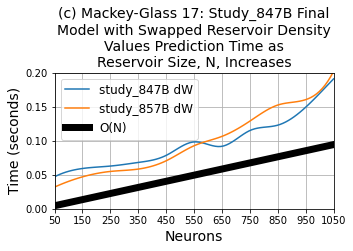

In [875]:
##### add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo24TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo24TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo24TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17: Study_847B Final\nModel with Swapped Reservoir Density\nValues Prediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [869]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo25= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo25TimeTrain = pd.DataFrame()
plotInfo25TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_857B'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo25 =            pd.concat((plotInfo25, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo25TimeTrain =   pd.concat((plotInfo25TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo25TimePredict = pd.concat((plotInfo25TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_847B
study_857B


In [850]:
plotInfo25 =            plotInfo25.rename(columns={"0": "study_847B dWin", "1": "study_857B dWin"})
plotInfo25TimeTrain =   plotInfo25TimeTrain.rename(columns={"0": "study_847B dWin", "1": "study_857B dWin"})
plotInfo25TimePredict = plotInfo25TimePredict.rename(columns={"0": "study_847B dWin", "1": "study_857B dWin"})

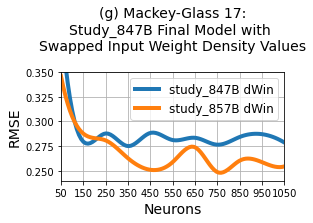

In [851]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo25.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo25.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo25.columns[col], linewidth=4)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(g) Mackey-Glass 17:\nStudy_847B Final Model with \nSwapped Input Weight Density Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.24,0.35])
plt.grid()
plt.show()

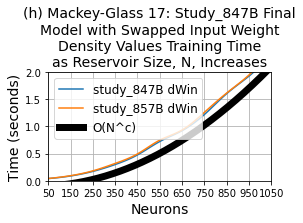

In [852]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo25TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo25TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo25TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000002*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Mackey-Glass 17: Study_847B Final\nModel with Swapped Input Weight\nDensity Values Training Time\nas Reservoir Size, N, Increases', fontsize=14)
plt.show()

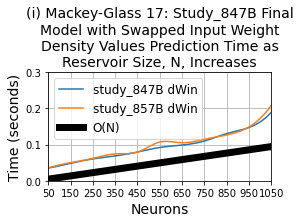

In [853]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo25TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo25TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo25TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Mackey-Glass 17: Study_847B Final\nModel with Swapped Input Weight\nDensity Values Prediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [114]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo26= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo26TimeTrain = pd.DataFrame()
plotInfo26TimePredict = pd.DataFrame()

p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_857B'].index[0]

    
    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo26 =            pd.concat((plotInfo26, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo26TimeTrain =   pd.concat((plotInfo26TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo26TimePredict = pd.concat((plotInfo26TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_847B
study_857B


In [115]:
plotInfo26 =            plotInfo26.rename(columns={"0": "study_847B sin", "1": "study_857B sin"})
plotInfo26TimeTrain =   plotInfo26TimeTrain.rename(columns={"0": "study_847B sin", "1": "study_857B sin"})
plotInfo26TimePredict = plotInfo26TimePredict.rename(columns={"0": "study_847B sin", "1": "study_857B sin"})

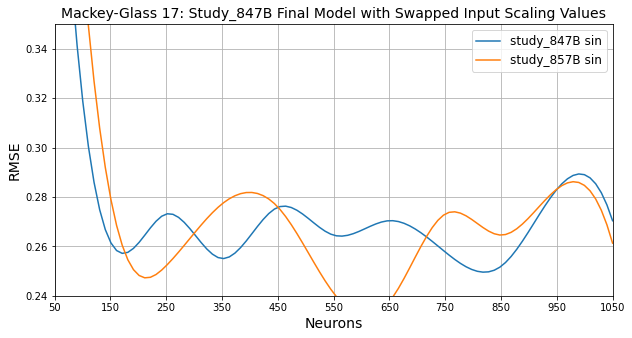

In [379]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo26.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo26.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo26.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('Mackey-Glass 17: Study_847B Final Model with Swapped Input Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.24,0.35])
plt.grid()
plt.show()

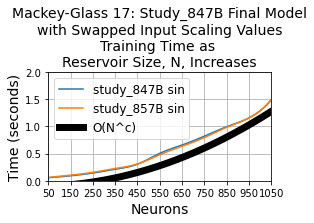

In [117]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo26TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo26TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo26TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Study_847B Final Model\nwith Swapped Input Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

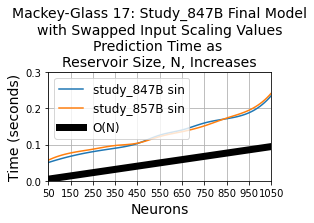

In [118]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo26TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo26TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo26TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: Study_847B Final Model\nwith Swapped Input Scaling Values\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [119]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo27= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo27TimeTrain = pd.DataFrame()
plotInfo27TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_857B'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo27 =            pd.concat((plotInfo27, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo27TimeTrain =   pd.concat((plotInfo27TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo27TimePredict = pd.concat((plotInfo27TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_847B
study_857B


In [120]:
plotInfo27 =            plotInfo27.rename(columns={"0": "study_847B Beta", "1": "study_857B Beta"})
plotInfo27TimeTrain =   plotInfo27TimeTrain.rename(columns={"0": "study_847B Beta", "1": "study_857B Beta"})
plotInfo27TimePredict = plotInfo27TimePredict.rename(columns={"0": "study_847B Beta", "1": "study_857B Beta"})

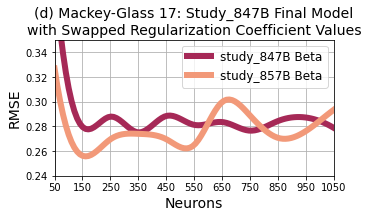

In [380]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo27.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo27.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo27.columns[col], color=colors[col], linewidth = 6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Mackey-Glass 17: Study_847B Final Model\nwith Swapped Regularization Coefficient Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.24,0.35])
plt.grid()
plt.show()

In [122]:
plotInfo27.iloc[9,1]-plotInfo27.iloc[9,0]

-0.011092663437442585

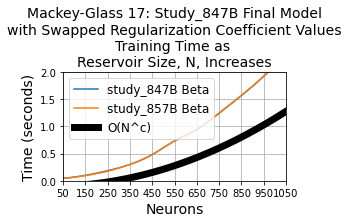

In [123]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo27TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo27TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo27TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Study_847B Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

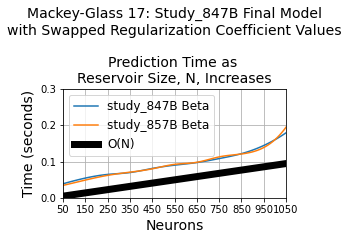

In [124]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo27TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo27TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo27TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: Study_847B Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Wfb

In [125]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo40= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo40TimeTrain = pd.DataFrame()
plotInfo40TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_857B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dfb = studies.iloc[i,2].params['dfb']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo40 =            pd.concat((plotInfo40, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo40TimeTrain =   pd.concat((plotInfo40TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo40TimePredict = pd.concat((plotInfo40TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_847B
0.03867430686950683
0.08793173517499651
0.17007247039249965
0.30319883142198834
0.4606191378373366
0.7371586286104642
0.9520324638911656
1.2473047120230538
1.5713073355810983
1.9522058282579695
2.333389060837882
study_857B
0.03761145046779087
0.08879419735499791
0.17457996095929826
0.29843128522237145
0.4783539261136736
0.7326221636363438
0.9415156205495199
1.2354309558868408
1.5610488414764405
1.9467325369517008
2.4884153842926025


In [126]:
plotInfo40 =            plotInfo40.rename(columns={"0": "study_847B dfb", "1": "study_857B dfb"})
plotInfo40TimeTrain =   plotInfo40TimeTrain.rename(columns={"0": "study_847B dfb", "1": "study_857B dfb"})
plotInfo40TimePredict = plotInfo40TimePredict.rename(columns={"0": "study_847B dfb", "1": "study_857B dfb"})

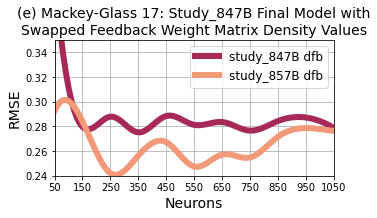

In [382]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo40.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo40.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo40.columns[col], color=colors[col], linewidth=6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(e) Mackey-Glass 17: Study_847B Final Model with\nSwapped Feedback Weight Matrix Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.24,0.35])
plt.grid()
plt.show()

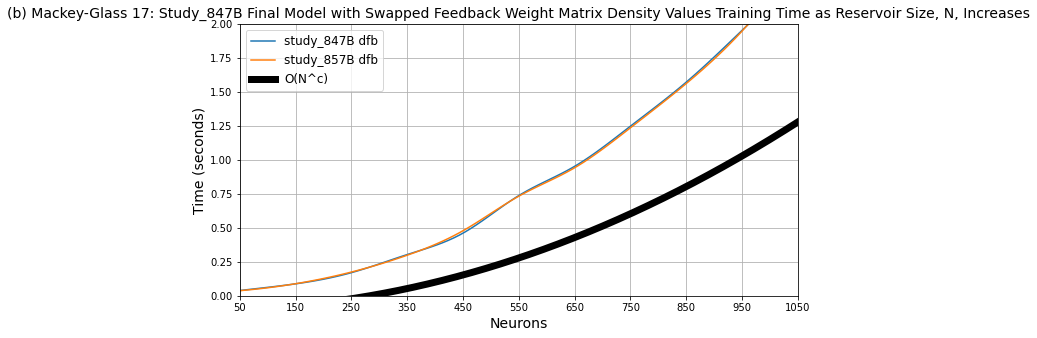

In [480]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo40TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo40TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo40TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey-Glass 17: Study_847B Final Model with Swapped Feedback Weight Matrix Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

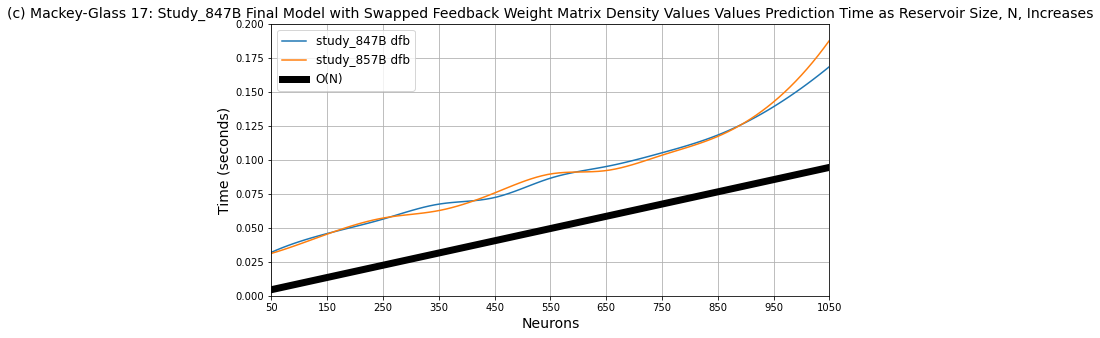

In [481]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo40TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo40TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo40TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,.2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17: Study_847B Final Model with Swapped Feedback Weight Matrix Density Values Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Feedback

In [854]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo41= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo41TimeTrain = pd.DataFrame()
plotInfo41TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_847B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_857B'].index[0]

    
    print(studies.iloc[i,0])
    sfb = studies.iloc[i,2].params['sfb']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo41 =            pd.concat((plotInfo41, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo41TimeTrain =   pd.concat((plotInfo41TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo41TimePredict = pd.concat((plotInfo41TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_847B
study_857B


In [855]:
plotInfo41 =            plotInfo41.rename(columns={"0": "study_847B sfb", "1": "study_857B sfb"})
plotInfo41TimeTrain =   plotInfo41TimeTrain.rename(columns={"0": "study_847B sfb", "1": "study_857B sfb"})
plotInfo41TimePredict = plotInfo41TimePredict.rename(columns={"0": "study_847B sfb", "1": "study_857B sfb"})

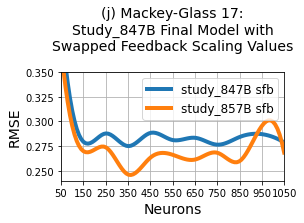

In [856]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo41.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo41.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo41.columns[col], linewidth=4)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(j) Mackey-Glass 17:\nStudy_847B Final Model with\nSwapped Feedback Scaling Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.24,0.35])
plt.grid()
plt.show()

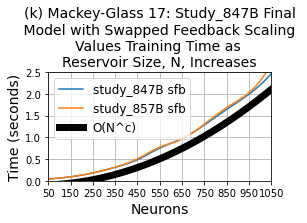

In [857]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo41TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo41TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo41TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000002*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2.5])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(k) Mackey-Glass 17: Study_847B Final\n Model with Swapped Feedback Scaling \nValues Training Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

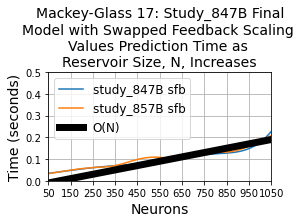

In [858]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo41TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo41TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo41TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0002*n)-0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: Study_847B Final\nModel with Swapped Feedback Scaling \nValues Prediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

# Is there an overwhelming difference in how the distribution type changes the model?

## How did the parameters vary between the models with different distributions?

In [131]:
print(studies.loc[studies.iloc[:,0] == 'study_2479'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_2479'].iloc[0,2].params

study_2479


{'p': 0.991071914307554,
 'a': 0.07221371884386706,
 'dw': 0.2135048663888954,
 'dfb': 0.7488981188946986,
 'din': 0.3665722616384989,
 'sin': 0.7097452299944581,
 'sfb': 0.3200502088123849,
 'B': 1.5170112037327626e-09}

In [132]:
print(studies.loc[studies.iloc[:,0] == 'study_247A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_247A'].iloc[0,2].params

study_247A


{'p': 0.7571975830690131,
 'a': 0.13236744745252335,
 'dw': 0.9741341626544963,
 'dfb': 0.42257143743633196,
 'din': 0.05160499812227359,
 'sin': 0.5100716295102906,
 'sfb': 1.8729564976753874,
 'B': 5.7123355007507225e-08}

In [133]:
print(studies.loc[studies.iloc[:,0] == 'study_247B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_247B'].iloc[0,2].params

study_247B


{'p': 0.8378701033963081,
 'a': 0.20031343625871822,
 'dw': 0.17069864486608977,
 'dfb': 0.5003661645248476,
 'din': 0.2543342079553447,
 'sin': 0.4982596731051697,
 'sfb': 1.578269374846836,
 'B': 5.619218425978607e-09}

#### Plotted each Model w/ Different Parameters/Distribution

In [484]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo4TimeTrain = pd.DataFrame()
plotInfo4TimePredict = pd.DataFrame()

while(count < 3): #Select models for evaluation
    #Select a model
    i = 0
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo4 = pd.concat((plotInfo4, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo4TimeTrain = pd.concat((plotInfo4TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo4TimePredict = pd.concat((plotInfo4TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [485]:
plotInfo4 = plotInfo4.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})
plotInfo4TimeTrain = plotInfo4TimeTrain.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})
plotInfo4TimePredict = plotInfo4TimePredict.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})

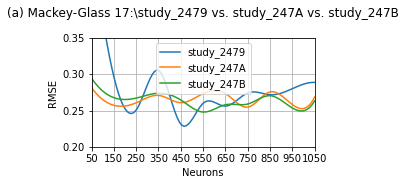

In [492]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.2,0.35])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(a) Mackey-Glass 17:\study_2479 vs. study_247A vs. study_247B\n')
plt.show()

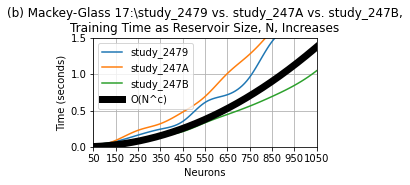

In [487]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(b) Mackey-Glass 17:\study_2479 vs. study_247A vs. study_247B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

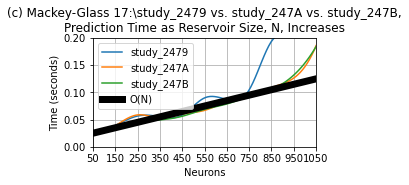

In [488]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.20])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17:\study_2479 vs. study_247A vs. study_247B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

### Using the same set of parameters, does varying the distribution impair the model's ability to perform?

#### Using Parameter's of study_2479 optimized model

In [142]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo5 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo5TimeTrain = pd.DataFrame()
plotInfo5TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo5 = pd.concat((plotInfo5, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo5TimeTrain = pd.concat((plotInfo5TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo5TimePredict = pd.concat((plotInfo5TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [143]:
plotInfo5 = plotInfo5.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})
plotInfo5TimeTrain = plotInfo5TimeTrain.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})
plotInfo5TimePredict = plotInfo5TimePredict.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})

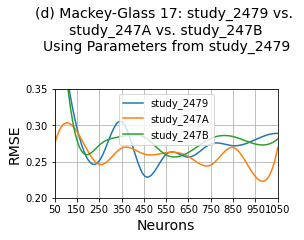

In [514]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.2,0.35])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(d) Mackey-Glass 17: study_2479 vs. \nstudy_247A vs. study_247B\nUsing Parameters from study_2479\n\n', fontsize=14)
plt.show()

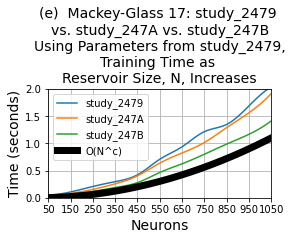

In [627]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e)  Mackey-Glass 17: study_2479 \nvs. study_247A vs. study_247B\nUsing Parameters from study_2479,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

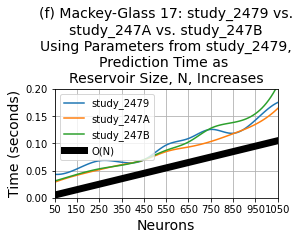

In [630]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Mackey-Glass 17: study_2479 vs.\nstudy_247A vs. study_247B\nUsing Parameters from study_2479,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

#### Using Parameter's of study_247A optimized model

In [504]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo6 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo6TimeTrain = pd.DataFrame()
plotInfo6TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_247A'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo6 = pd.concat((plotInfo6, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo6TimeTrain = pd.concat((plotInfo6TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo6TimePredict = pd.concat((plotInfo6TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [505]:
plotInfo6 = plotInfo6.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})
plotInfo6TimeTrain = plotInfo6TimeTrain.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})
plotInfo6TimePredict = plotInfo6TimePredict.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})

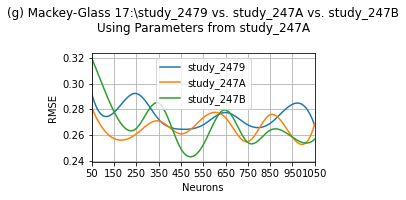

In [631]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6.columns[col])

plt.legend()
plt.xlim([50,1050])
#plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(g) Mackey-Glass 17:\study_2479 vs. study_247A vs. study_247B\nUsing Parameters from study_247A\n')
plt.show()

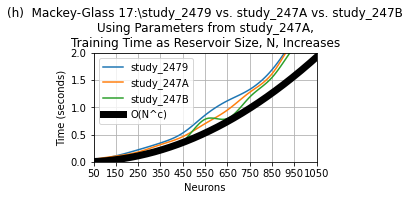

In [638]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000175*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(h)  Mackey-Glass 17:\study_2479 vs. study_247A vs. study_247B\nUsing Parameters from study_247A,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

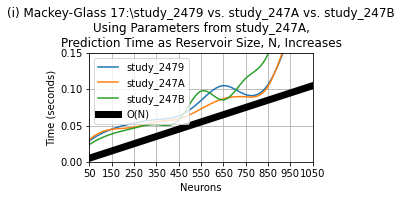

In [639]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Mackey-Glass 17:\study_2479 vs. study_247A vs. study_247B\nUsing Parameters from study_247A,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

#### Using Parameter's of study_846B optimized model

In [509]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo7 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo7TimeTrain = pd.DataFrame()
plotInfo7TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo7 = pd.concat((plotInfo7, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo7TimeTrain = pd.concat((plotInfo7TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo7TimePredict = pd.concat((plotInfo7TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [510]:
plotInfo7 = plotInfo7.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})
plotInfo7TimeTrain = plotInfo7TimeTrain.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})
plotInfo7TimePredict = plotInfo7TimePredict.rename(columns={"0": "study_2479", "1": "study_247A", "2": "study_247B"})

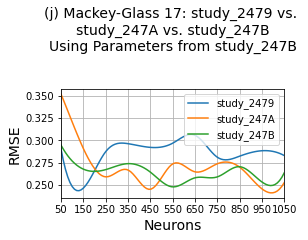

In [643]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7.columns[col])

plt.legend()
plt.xlim([50,1050])
#plt.ylim([0.01,0.08])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(j) Mackey-Glass 17: study_2479 vs. \nstudy_247A vs. study_247B\nUsing Parameters from study_247B\n\n', fontsize=14)
plt.show()

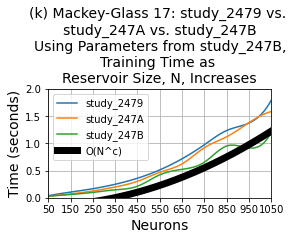

In [646]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.15
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(k) Mackey-Glass 17: study_2479 vs. \nstudy_247A vs. study_247B\nUsing Parameters from study_247B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

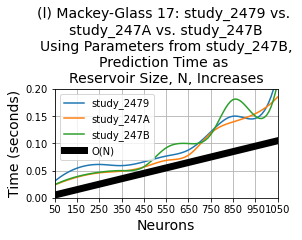

In [649]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.0
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) Mackey-Glass 17: study_2479 vs. \nstudy_247A vs. study_247B\nUsing Parameters from study_247B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## What parameters are controlling the influence of the distribution?

### spectral radius

In [923]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo28= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo28TimeTrain = pd.DataFrame()
plotInfo28TimePredict = pd.DataFrame()


i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    print(p)
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo28 =            pd.concat((plotInfo28, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo28TimeTrain =   pd.concat((plotInfo28TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo28TimePredict = pd.concat((plotInfo28TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_2479
0.991071914307554
study_247A
0.7571975830690131
study_247B
0.8378701033963081


In [924]:
plotInfo28 =            plotInfo28.rename(columns={"0": "study_2479 SR", "1": "study_247A SR", "2": "study_247B SR"})
plotInfo28TimeTrain =   plotInfo28TimeTrain.rename(columns={"0": "study_2479 SR", "1": "study_247A SR", "2": "study_247B SR"})
plotInfo28TimePredict = plotInfo28TimePredict.rename(columns={"0": "study_2479 SR", "1": "study_247A SR", "2": "study_247B SR"})

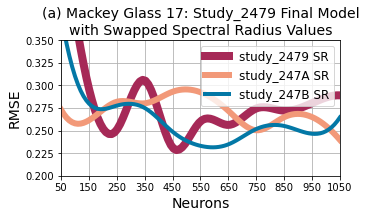

In [925]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo28.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo28.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo28.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Mackey Glass 17: Study_2479 Final Model\nwith Swapped Spectral Radius Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.35])
plt.grid()
plt.show()

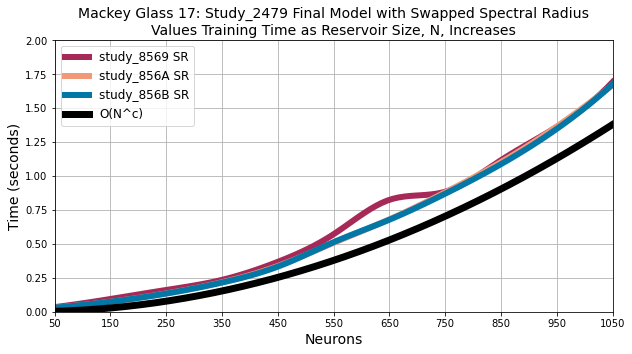

In [878]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo28TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo28TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo28TimeTrain.columns[col], color=colors[col], linewidth=6)
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey Glass 17: Study_2479 Final Model with Swapped Spectral Radius\nValues Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

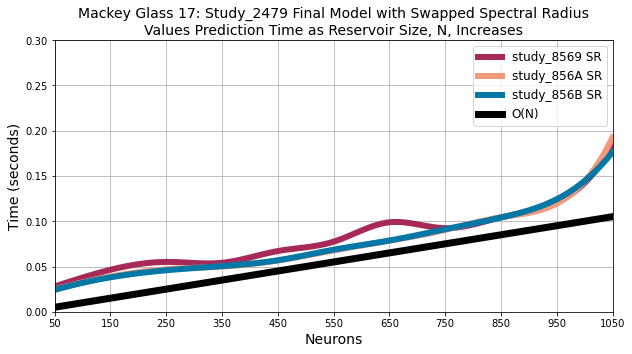

In [879]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo28TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo28TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo28TimePredict.columns[col], color=colors[col], linewidth=6)
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey Glass 17: Study_2479 Final Model with Swapped Spectral Radius\nValues Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [521]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo29= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo29TimeTrain = pd.DataFrame()
plotInfo29TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    a = studies.iloc[i,2].params['a']
    N=50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo29 =            pd.concat((plotInfo29, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo29TimeTrain =   pd.concat((plotInfo29TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo29TimePredict = pd.concat((plotInfo29TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_2479
0.030582761764526366
0.0744908196585519
0.13427319526672363
0.21460873740059988
0.33032166957855225
0.5031719888959613
0.6769750118255615
0.8624950249989828
1.0872687952859061
1.3356142725263322
1.69081818262736
study_247A
0.03017258644104004
0.07264876365661621
0.1332723413194929
0.21364969473618728
0.3334061929157802
0.5015063444773357
0.6693318911961147
0.8641684906823295
1.0808004311152868
1.3361592610677084
1.6630562714168005
study_247B
0.03027939796447754
0.07299296061197917
0.1314232689993722
0.21423235961369105
0.3283229385103498
0.5130588497434344
0.6703389031546456
0.859699281056722
1.0858114446912492
1.3371707711900984
1.6600524016789027


In [522]:
plotInfo29 =            plotInfo29.rename(columns={"0": "study_2479 LR", "1": "study_247A LR", "2": "study_247B LR"})
plotInfo29TimeTrain =   plotInfo29TimeTrain.rename(columns={"0": "study_2479 LR", "1": "study_247A LR", "2": "study_247B LR"})
plotInfo29TimePredict = plotInfo29TimePredict.rename(columns={"0": "study_2479 LR", "1": "study_247A LR", "2": "study_247B LR"})

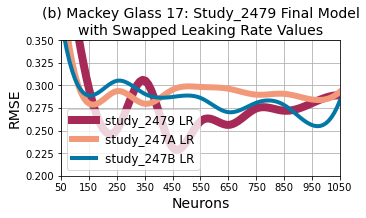

In [655]:
#add to plot
plt.figure(figsize=(5, 2.5))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo29.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo29.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo29.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(b) Mackey Glass 17: Study_2479 Final Model\nwith Swapped Leaking Rate Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.35])
plt.grid()
plt.show()

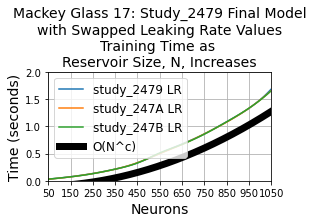

In [524]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo29TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo29TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo29TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey Glass 17: Study_2479 Final Model\nwith Swapped Leaking Rate Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

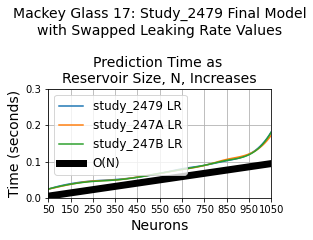

In [525]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo29TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo29TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo29TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey Glass 17: Study_2479 Final Model\nwith Swapped Leaking Rate Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [526]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo30= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo30TimeTrain = pd.DataFrame()
plotInfo30TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo30 =            pd.concat((plotInfo30, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo30TimeTrain =   pd.concat((plotInfo30TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo30TimePredict = pd.concat((plotInfo30TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_2479
study_247A
study_247B


In [527]:
plotInfo30 =            plotInfo30.rename(columns={"0": "study_2479 dW", "1": "study_247A dW", "2": "study_247B dW"})
plotInfo30TimeTrain =   plotInfo30TimeTrain.rename(columns={"0": "study_2479 dW", "1": "study_247A dW", "2": "study_247B dW"})
plotInfo30TimePredict = plotInfo30TimePredict.rename(columns={"0": "study_2479 dW", "1": "study_247A dW", "2": "study_247B dW"})

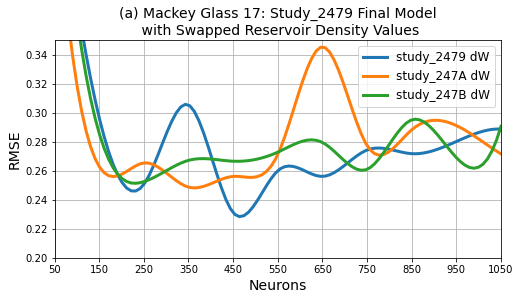

In [693]:
#add to plot
plt.figure(figsize=(8, 4))
for col in range(0,plotInfo30.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30.columns[col], linewidth=3)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Mackey Glass 17: Study_2479 Final Model\n with Swapped Reservoir Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.35])
plt.grid()
plt.show()

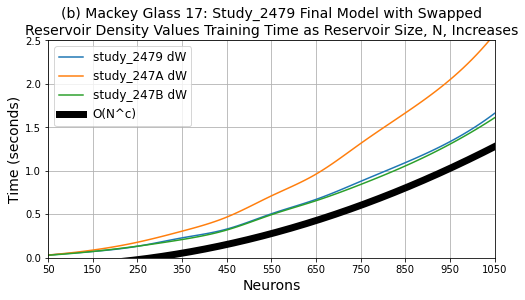

In [701]:
#add to plot
plt.figure(figsize=(8, 4))
for col in range(0,plotInfo30TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2.5])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey Glass 17: Study_2479 Final Model with Swapped\nReservoir Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

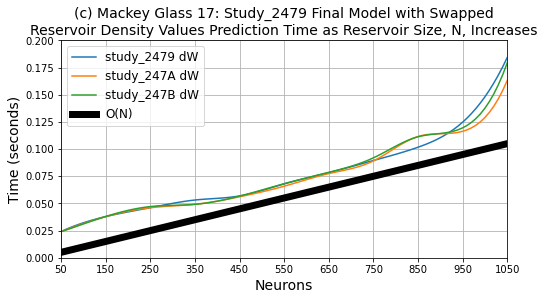

In [702]:
##### add to plot
plt.figure(figsize=(8, 4))
for col in range(0,plotInfo30TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo30TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo30TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey Glass 17: Study_2479 Final Model with Swapped\nReservoir Density Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [531]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo31= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo31TimeTrain = pd.DataFrame()
plotInfo31TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo31 =            pd.concat((plotInfo31, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo31TimeTrain =   pd.concat((plotInfo31TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo31TimePredict = pd.concat((plotInfo31TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_2479
study_247A
study_247B


In [532]:
plotInfo31 =            plotInfo31.rename(columns={"0": "study_2479 dWin", "1": "study_247A dWin", "2": "study_247B dWin"})
plotInfo31TimeTrain =   plotInfo31TimeTrain.rename(columns={"0": "study_2479 dWin", "1": "study_247A dWin", "2": "study_247B dWin"})
plotInfo31TimePredict = plotInfo31TimePredict.rename(columns={"0": "study_2479 dWin", "1": "study_247A dWin", "2": "study_247B dWin"})

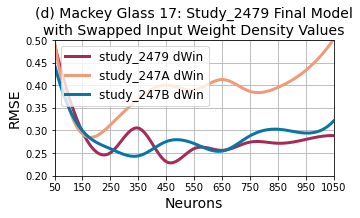

In [689]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo31.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo31.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo31.columns[col], color=colors[col], linewidth=3)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Mackey Glass 17: Study_2479 Final Model\nwith Swapped Input Weight Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.5])
plt.grid()
plt.show()

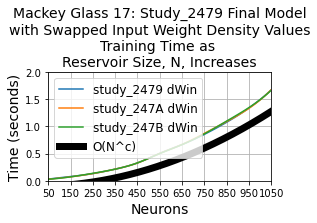

In [534]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo31TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo31TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo31TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey Glass 17: Study_2479 Final Model\nwith Swapped Input Weight Density Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

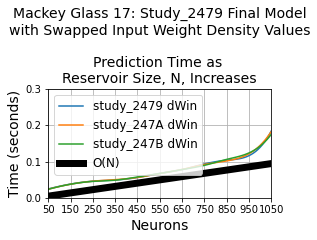

In [535]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo31TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo31TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo31TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey Glass 17: Study_2479 Final Model\nwith Swapped Input Weight Density Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [536]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo32= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo32TimeTrain = pd.DataFrame()
plotInfo32TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]

    
    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo32 =            pd.concat((plotInfo32, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo32TimeTrain =   pd.concat((plotInfo32TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo32TimePredict = pd.concat((plotInfo32TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_2479
study_247A
study_247B


In [537]:
plotInfo32 =            plotInfo32.rename(columns={"0": "study_2479 sin", "1": "study_247A sin", "2": "study_247B sin"})
plotInfo32TimeTrain =   plotInfo32TimeTrain.rename(columns={"0": "study_2479 sin", "1": "study_247A sin", "2": "study_247B sin"})
plotInfo32TimePredict = plotInfo32TimePredict.rename(columns={"0": "study_2479 sin", "1": "study_247A sin", "2": "study_247B sin"})

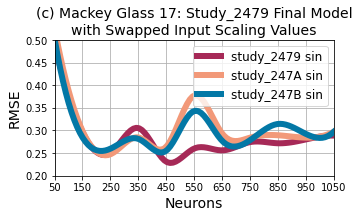

In [668]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo32.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo32.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo32.columns[col] ,color=colors[col], linewidth = 6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) Mackey Glass 17: Study_2479 Final Model\nwith Swapped Input Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.5])
plt.grid()
plt.show()

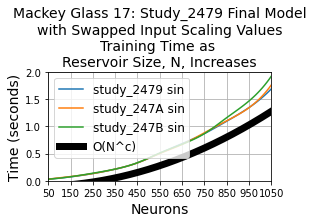

In [539]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo32TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo32TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo32TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey Glass 17: Study_2479 Final Model\nwith Swapped Input Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

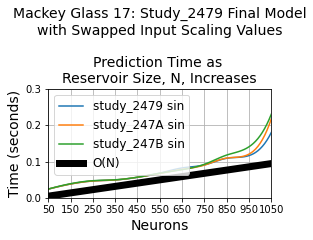

In [540]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo32TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo32TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo32TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey Glass 17: Study_2479 Final Model\nwith Swapped Input Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [541]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo33= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo33TimeTrain = pd.DataFrame()
plotInfo33TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo33 =            pd.concat((plotInfo33, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo33TimeTrain =   pd.concat((plotInfo33TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo33TimePredict = pd.concat((plotInfo33TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_2479
study_247A
study_247B


In [542]:
plotInfo33 =            plotInfo33.rename(columns={"0": "study_2479 Beta", "1": "study_247A Beta", "2": "study_247B Beta"})
plotInfo33TimeTrain =   plotInfo33TimeTrain.rename(columns={"0": "study_2479 Beta", "1": "study_247A Beta", "2": "study_247B Beta"})
plotInfo33TimePredict = plotInfo33TimePredict.rename(columns={"0": "study_2479 Beta", "1": "study_247A Beta", "2": "study_247B Beta"})

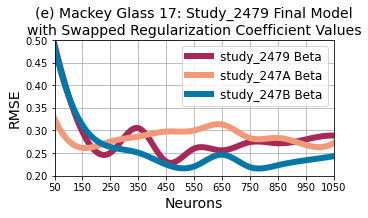

In [670]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo33.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo33.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo33.columns[col], color=colors[col], linewidth = 6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(e) Mackey Glass 17: Study_2479 Final Model\nwith Swapped Regularization Coefficient Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.5])
plt.grid()
plt.show()

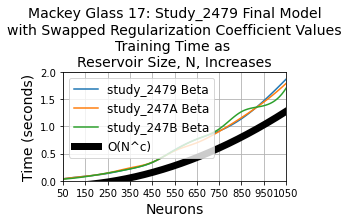

In [544]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo33TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo33TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo33TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey Glass 17: Study_2479 Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

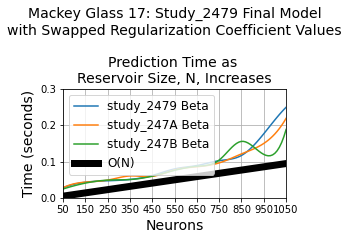

In [545]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo33TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo33TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo33TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey Glass 17: Study_2479 Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Wfb

In [546]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo42= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo42TimeTrain = pd.DataFrame()
plotInfo42TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    
    print(studies.iloc[i,0])
    N = 50
    dfb = studies.iloc[i,2].params['dfb']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo42 =            pd.concat((plotInfo42, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo42TimeTrain =   pd.concat((plotInfo42TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo42TimePredict = pd.concat((plotInfo42TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_2479
study_247A
study_247B


In [547]:
plotInfo42 =            plotInfo42.rename(columns={"0": "study_2479 dfb", "1": "study_247A dfb", "2": "study_247B dfb"})
plotInfo42TimeTrain =   plotInfo42TimeTrain.rename(columns={"0": "study_2479 dfb", "1": "study_247A dfb", "2": "study_247B dfb"})
plotInfo42TimePredict = plotInfo42TimePredict.rename(columns={"0": "study_2479 dfb", "1": "study_247A dfb", "2": "study_247B dfb"})

In [548]:
plotInfo42

study_2479 dfb  study_247A dfb  study_247B dfb
0         0.489657        0.476756        0.524963
1         0.296651        0.282936        0.281245
2         0.250655        0.316153        0.257955
3         0.305490        0.345326        0.301815
4         0.231164        0.248679        0.236734
5         0.260057        0.233788        0.230878
6         0.256140        0.290027        0.370368
7         0.274349        0.366753        0.255598
8         0.271831        0.268770        0.326198
9         0.280217        0.281013        0.263051
10        0.288822        0.322664        0.364885

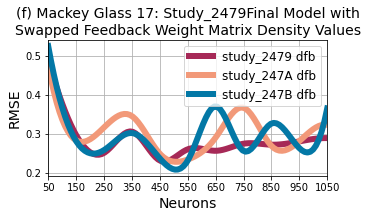

In [671]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo42.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo42.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo42.columns[col], color=colors[col], linewidth=6)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(f) Mackey Glass 17: Study_2479Final Model with\nSwapped Feedback Weight Matrix Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
#plt.ylim([0.04,0.05])
plt.grid()
plt.show()

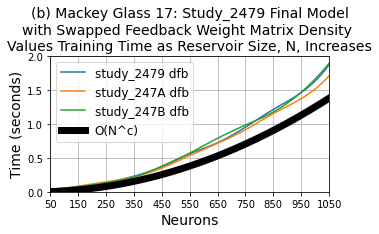

In [683]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo42TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo42TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo42TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey Glass 17: Study_2479 Final Model\nwith Swapped Feedback Weight Matrix Density \nValues Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

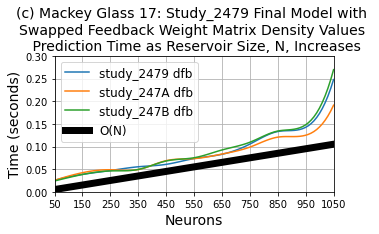

In [685]:
##### add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo42TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo42TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo42TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey Glass 17: Study_2479 Final Model with \nSwapped Feedback Weight Matrix Density Values \n Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Feedback

In [552]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo43= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo43TimeTrain = pd.DataFrame()
plotInfo43TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 3): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_2479'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]

    
    print(studies.iloc[i,0])
    sfb = studies.iloc[i,2].params['sfb']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo43 =            pd.concat((plotInfo43, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo43TimeTrain =   pd.concat((plotInfo43TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo43TimePredict = pd.concat((plotInfo43TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_2479
study_247A
study_247B


In [553]:
plotInfo43 =            plotInfo43.rename(columns={"0": "study_2479 sfb", "1": "study_247A sfb", "2": "study_247B sfb"})
plotInfo43TimeTrain =   plotInfo43TimeTrain.rename(columns={"0": "study_2479 sfb", "1": "study_247A sfb", "2": "study_247B sfb"})
plotInfo43TimePredict = plotInfo43TimePredict.rename(columns={"0": "study_2479 sfb", "1": "study_247A sfb", "2": "study_247B sfb"})

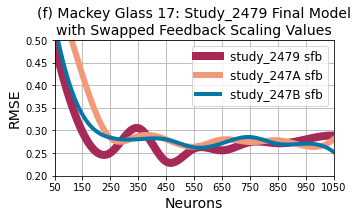

In [686]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
for col in range(0,plotInfo43.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo43.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo43.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(f) Mackey Glass 17: Study_2479 Final Model\nwith Swapped Feedback Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.5])
plt.grid()
plt.show()

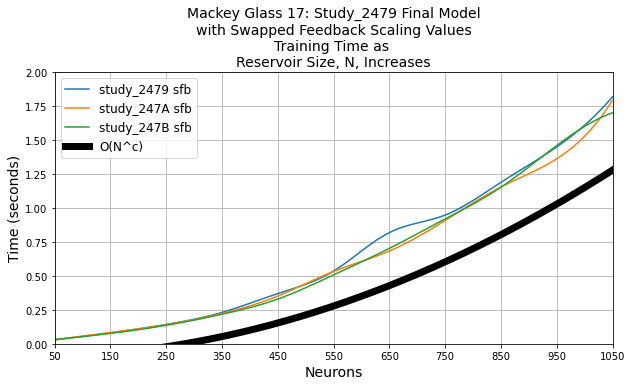

In [555]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo43TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo43TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo43TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey Glass 17: Study_2479 Final Model\nwith Swapped Feedback Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

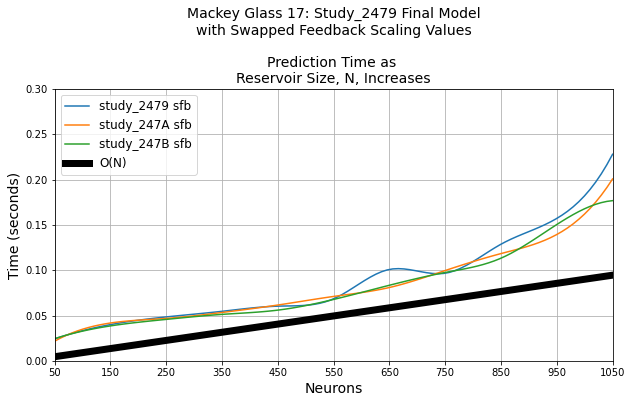

In [687]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo43TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo43TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo43TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey Glass 17: Study_2479 Final Model\nwith Swapped Feedback Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

# Which connections within the reservoir give the best setup for this pattern generation task?

## How did the parameters vary between the models with different connections?

In [557]:
print(studies.loc[studies.iloc[:,0] == 'study_157A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_157A'].iloc[0,2].params

study_157A


{'p': 0.8214349758188078,
 'a': 0.30952278967316155,
 'dw': 0.17103089908712743,
 'dfb': 0.25657972316283245,
 'din': 0.21224987611601281,
 'sin': 0.36398917051215135,
 'sfb': 0.30285834340387124,
 'B': 0.06999777589279121}

In [558]:
print(studies.loc[studies.iloc[:,0] == 'study_257A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_257A'].iloc[0,2].params

study_257A


{'p': 0.8638836711567277,
 'a': 0.13024315095730368,
 'dw': 0.32260008755667496,
 'dfb': 0.4394928133015575,
 'din': 0.6094770013519365,
 'sin': 0.11310697954512551,
 'sfb': 0.19906216274112154,
 'B': 1.0918857135676655e-09}

In [559]:
print(studies.loc[studies.iloc[:,0] == 'study_357A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_357A'].iloc[0,2].params

study_357A


{'p': 0.6283426532956777,
 'a': 0.17793265564129426,
 'dw': 0.6472459071059949,
 'dfb': 0.4457308598739649,
 'din': 0.1565681273515478,
 'sin': 0.5708915821547367,
 'sfb': 1.47028384513009,
 'B': 0.021763191506120824}

In [560]:
print(studies.loc[studies.iloc[:,0] == 'study_857A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_857A'].iloc[0,2].params

study_857A


{'p': 0.8991367866988835,
 'a': 0.56097619546012,
 'dw': 0.12417035855651491,
 'dfb': 0.22069613244658512,
 'din': 0.10662821398175754,
 'sin': 0.3305307464627632,
 'sfb': 0.34897083133959644,
 'B': 3.0788893071333886e-09}

#### Plotted each Model w/ Different Parameters/Distribution

In [561]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo8= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo8TimeTrain = pd.DataFrame()
plotInfo8TimePredict = pd.DataFrame()

while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_157A'].index[0]
        #uConn = True
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_257A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_357A'].index[0]
        #uConn = True
        #yConn = True
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
        #yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo8 = pd.concat((plotInfo8, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo8TimeTrain = pd.concat((plotInfo8TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo8TimePredict = pd.concat((plotInfo8TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [563]:
plotInfo8 = plotInfo8.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})
plotInfo8TimeTrain = plotInfo8TimeTrain.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})
plotInfo8TimePredict = plotInfo8TimePredict.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})

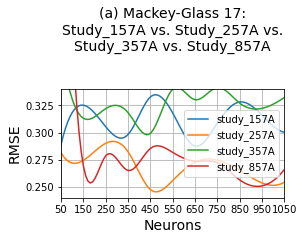

In [706]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.24,0.34])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14)
plt.title('(a) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A\n\n', fontsize=14)
plt.show()

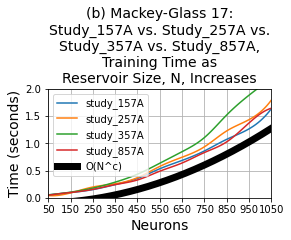

In [713]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

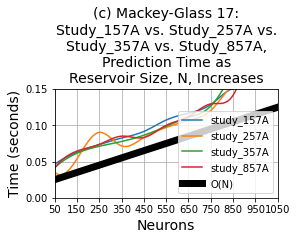

In [566]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Using the same set of parameters, does varying the connection impair the model's ability to perform?

In [567]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo9= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo9TimeTrain = pd.DataFrame()
plotInfo9TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_157A'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo9 = pd.concat((plotInfo9, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo9TimeTrain = pd.concat((plotInfo9TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo9TimePredict = pd.concat((plotInfo9TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [568]:
plotInfo9 = plotInfo9.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})
plotInfo9TimeTrain = plotInfo9TimeTrain.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})
plotInfo9TimePredict = plotInfo9TimePredict.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})

In [569]:
plotInfo9.head()

study_157A  study_257A  study_357A  study_857A
0    0.288701    0.299732    0.320287    0.288878
1    0.325202    0.300923    0.309698    0.264443
2    0.305509    0.322335    0.316362    0.305107
3    0.298036    0.304288    0.340116    0.306556
4    0.332633    0.273185    0.339110    0.262065

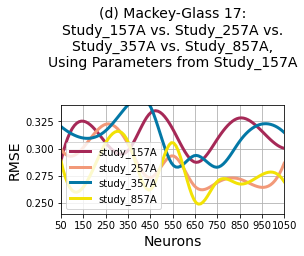

In [709]:
#add to plot
plt.figure(figsize=(4, 2))
changeWidth = 7
size = plotInfo9.shape[1]
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,int(size / 2)):
    X_Y_Spline = make_interp_spline(x, plotInfo9.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9.columns[col],linewidth=3, color=colors[col])
    changeWidth = changeWidth - 5
    
changeWidth = 7
for col in range(int(size / 2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo9.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9.columns[col],linewidth=3, color=colors[col])
    changeWidth = changeWidth- 5

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.24,0.34])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(d) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_157A\n\n', fontsize=14)
plt.show()

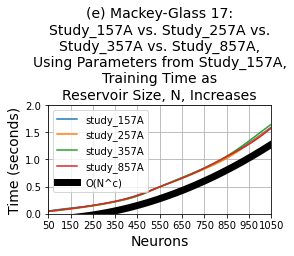

In [711]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo9TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_157A,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

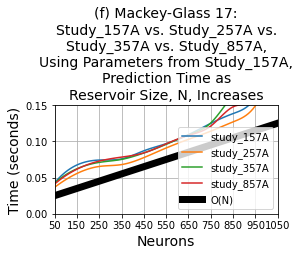

In [572]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo9TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_157A,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [573]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo10= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo10TimeTrain = pd.DataFrame()
plotInfo10TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_257A'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo10 = pd.concat((plotInfo10, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo10TimeTrain = pd.concat((plotInfo10TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo10TimePredict = pd.concat((plotInfo10TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [574]:
plotInfo10 = plotInfo10.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})
plotInfo10TimeTrain = plotInfo10TimeTrain.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})
plotInfo10TimePredict = plotInfo10TimePredict.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})

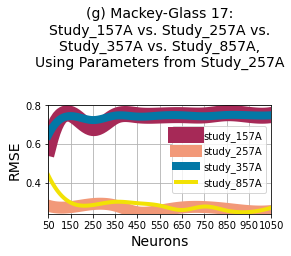

In [715]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 16
for col in range(0,plotInfo10.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10.columns[col], color=colors[col], linewidth = changeWidth)
    changeWidth = changeWidth - 4

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.24,0.8])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(g) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_257A\n\n', fontsize=14)
plt.show()

In [576]:
plotInfo10

study_157A  study_257A  study_357A  study_857A
0     0.580630    0.281564    0.645194    0.439392
1     0.754677    0.274367    0.743286    0.298030
2     0.681365    0.290070    0.722728    0.285221
3     0.742867    0.282564    0.745770    0.301832
4     0.747716    0.247681    0.740627    0.294656
5     0.746220    0.255707    0.746075    0.282284
6     0.748108    0.272681    0.747555    0.259457
7     0.746924    0.274660    0.742370    0.277578
8     0.758145    0.265430    0.748938    0.256419
9     0.749583    0.253751    0.747607    0.249208
10    0.748937    0.254233    0.747619    0.271406

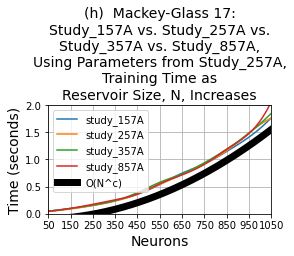

In [577]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo10TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h)  Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_257A,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

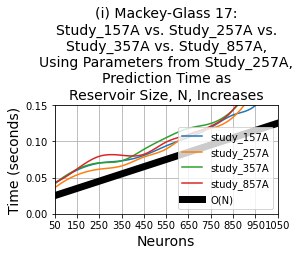

In [578]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo10TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_257A,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [727]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo11= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo11TimeTrain = pd.DataFrame()
plotInfo11TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_357A'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo11 = pd.concat((plotInfo11, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo11TimeTrain = pd.concat((plotInfo11TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo11TimePredict = pd.concat((plotInfo11TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [728]:
plotInfo11 = plotInfo11.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})
plotInfo11TimeTrain = plotInfo11TimeTrain.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})
plotInfo11TimePredict = plotInfo11TimePredict.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})

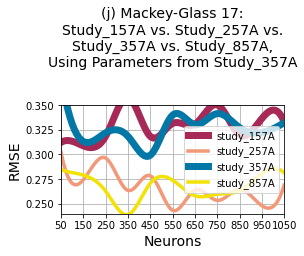

In [729]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
size = plotInfo11.shape[1]
changeWidth = 7
for col in range(0,int(size/2)):
    X_Y_Spline = make_interp_spline(x, plotInfo11.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth / 2
    
changeWidth = 7
for col in range(int(size/2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo11.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth / 2

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.24,0.35])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(j) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_357A\n\n', fontsize=14)
plt.show()

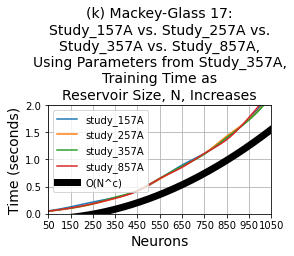

In [730]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo11TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(k) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_357A,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

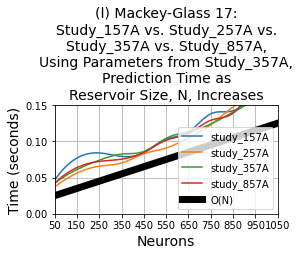

In [731]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo11TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_357A,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [584]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo12= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo12TimeTrain = pd.DataFrame()
plotInfo12TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    print(studies.iloc[i,0])
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo12 = pd.concat((plotInfo12, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo12TimeTrain = pd.concat((plotInfo12TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo12TimePredict = pd.concat((plotInfo12TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_857A
study_857A
study_857A
study_857A


In [585]:
plotInfo12 = plotInfo12.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})
plotInfo12TimeTrain = plotInfo12TimeTrain.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})
plotInfo12TimePredict = plotInfo12TimePredict.rename(columns={"0": "study_157A", "1": "study_257A", "2": "study_357A", "3": "study_857A"})

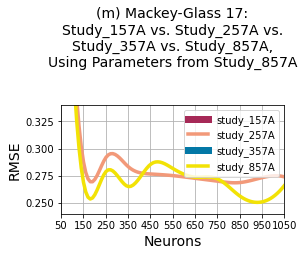

In [725]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
size = plotInfo12.shape[1]
changeWidth = 7
for col in range(0,int(size/2)):
    X_Y_Spline = make_interp_spline(x, plotInfo12.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth / 2
    
changeWidth = 7
for col in range(int(size/2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo12.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth / 2

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.24,0.34])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE', fontsize=14) 
plt.title('(m) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_857A\n\n', fontsize=14)
plt.show()

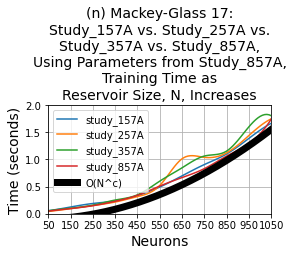

In [587]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo12TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000015*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(n) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_857A,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

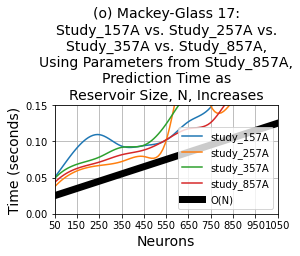

In [588]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo12TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(o) Mackey-Glass 17:\nStudy_157A vs. Study_257A vs.\nStudy_357A vs. Study_857A,\nUsing Parameters from Study_857A,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

## What parameters are controlling the influence of the connections

### spectral radius

In [747]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo16= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo16TimeTrain = pd.DataFrame()
plotInfo16TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_157A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_257A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_357A'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo16 = pd.concat((plotInfo16, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo16TimeTrain = pd.concat((plotInfo16TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo16TimePredict = pd.concat((plotInfo16TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_157A
study_257A
study_357A
study_857A


In [748]:
plotInfo16 =            plotInfo16.rename(columns={"0": "study_157A SR", "1": "study_257A SR", "2": "study_357A SR", "3": "study_857A SR"})
plotInfo16TimeTrain =   plotInfo16TimeTrain.rename(columns={"0": "study_157A SR", "1": "study_257A SR", "2": "study_357A SR", "3": "study_857A SR"})
plotInfo16TimePredict = plotInfo16TimePredict.rename(columns={"0": "study_157A SR", "1": "study_257A SR", "2": "study_357A SR", "3": "study_857A SR"})

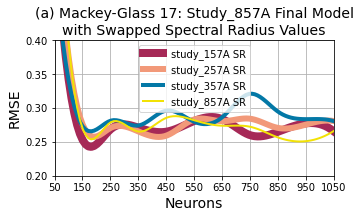

In [749]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo16.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend()
plt.xlim([50,1050])
plt.title('(a) Mackey-Glass 17: Study_857A Final Model\nwith Swapped Spectral Radius Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.4])
plt.grid()
plt.show()

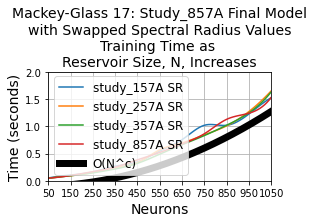

In [750]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo16TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Spectral Radius Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

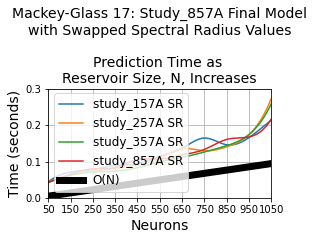

In [751]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo16TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Spectral Radius Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [236]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo17= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo17TimeTrain = pd.DataFrame()
plotInfo17TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    N = 50
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_157A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_257A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_357A'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
    
    print(studies.iloc[i,0])
    a = studies.iloc[i,2].params['a']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo17 =            pd.concat((plotInfo17, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo17TimeTrain =   pd.concat((plotInfo17TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo17TimePredict = pd.concat((plotInfo17TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_157A
0.05367468198140462
0.12147988591875349
0.18007806142171223
0.2558913707733154
0.37462614263807026
0.590675950050354
0.6794823328653972
0.9455585820334298
1.1627260957445418
1.4214575631277901
1.741317936352321
study_257A
0.051879135767618816
0.09616557189396449
0.15573589007059732
0.2547632058461507
0.3746492862701416
0.5872198581695557
0.7834545884813581
0.9438455899556478
1.2367154019219535
1.4782793181283134
1.8189796039036341
study_357A
0.05587773323059082
0.10202179636274065
0.16677512441362655
0.26992243986863357
0.39998539856501986
0.6076355831963676
0.7895661081586566
1.00119149684906
1.266724910054888
1.560720682144165
1.8195999009268624
study_857A
0.05773773560157189
0.10896955217633929
0.19123568534851074
0.27951530047825407
0.41158366203308105
0.6412505252020699
0.7752583197184971
0.9919103043419975
1.2783565680185953
1.5537891864776612
1.8674575260707311


In [237]:
plotInfo17 =            plotInfo17.rename(columns={"0": "study_157A LR", "1": "study_257A LR", "2": "study_357A LR", "3": "study_857A LR"})
plotInfo17TimeTrain =   plotInfo17TimeTrain.rename(columns={"0": "study_157A LR", "1": "study_257A LR", "2": "study_357A LR", "3": "study_857A LR"})
plotInfo17TimePredict = plotInfo17TimePredict.rename(columns={"0": "study_157A LR", "1": "study_257A LR", "2": "study_357A LR", "3": "study_857A LR"})

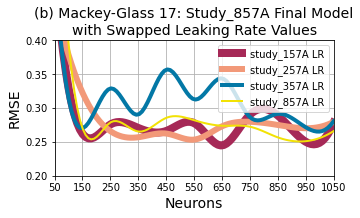

In [739]:
#add to plot
plt.figure(figsize=(5, 2.5))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo17.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo17.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo17.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend()
plt.xlim([50,1050])
plt.title('(b) Mackey-Glass 17: Study_857A Final Model\nwith Swapped Leaking Rate Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.4])
plt.grid()
plt.show()

In [239]:
plotInfo17

study_157A LR  study_257A LR  study_357A LR  study_857A LR
0        0.505194       0.457171       0.505900       0.711451
1        0.261820       0.322439       0.270141       0.270065
2        0.275547       0.265729       0.328542       0.278479
3        0.270428       0.256747       0.290176       0.265155
4        0.265932       0.262203       0.356106       0.285235
5        0.277608       0.253244       0.312511       0.281849
6        0.244700       0.272781       0.343362       0.273709
7        0.289858       0.279518       0.286460       0.272263
8        0.288798       0.274842       0.291279       0.256569
9        0.250112       0.269996       0.271494       0.250922
10       0.278146       0.279414       0.280351       0.265762

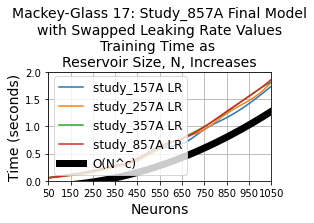

In [240]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo17TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo17TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo17TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Leaking Rate Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

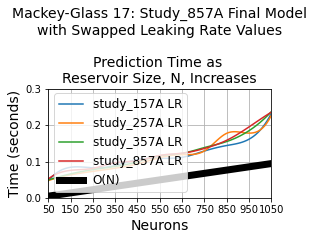

In [241]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo17TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo17TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo17TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Leaking Rate Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [758]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo18= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo18TimeTrain = pd.DataFrame()
plotInfo18TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_157A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_257A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_357A'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo18 =            pd.concat((plotInfo18, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo18TimeTrain =   pd.concat((plotInfo18TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo18TimePredict = pd.concat((plotInfo18TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_157A
study_257A
study_357A
study_857A


In [759]:
plotInfo18 =            plotInfo18.rename(columns={"0": "study_157A dW", "1": "study_257A dW", "2": "study_357A dW", "3": "study_857A dW"})
plotInfo18TimeTrain =   plotInfo18TimeTrain.rename(columns={"0": "study_157A dW", "1": "study_257A dW", "2": "study_357A dW", "3": "study_857A dW"})
plotInfo18TimePredict = plotInfo18TimePredict.rename(columns={"0": "study_157A dW", "1": "study_257A dW", "2": "study_357A dW", "3": "study_857A dW"})

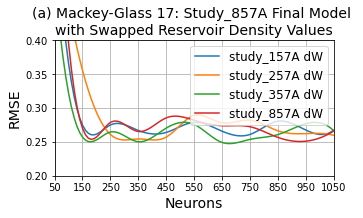

In [789]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo18.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo18.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo18.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Mackey-Glass 17: Study_857A Final Model \nwith Swapped Reservoir Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.4])
plt.grid()
plt.show()

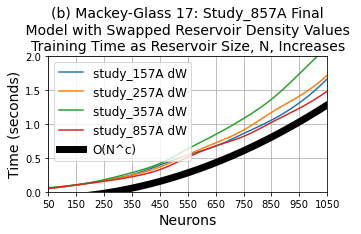

In [795]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo18TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo18TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo18TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey-Glass 17: Study_857A Final\n Model with Swapped Reservoir Density Values \nTraining Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

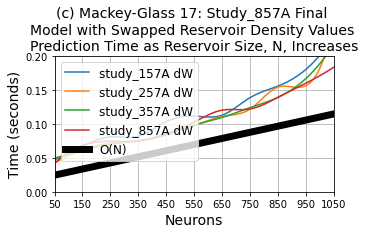

In [797]:
##### add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo18TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo18TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo18TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17: Study_857A Final \nModel with Swapped Reservoir Density Values \nPrediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [763]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo19= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo19TimeTrain = pd.DataFrame()
plotInfo19TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_157A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_257A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_357A'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo19 =            pd.concat((plotInfo19, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo19TimeTrain =   pd.concat((plotInfo19TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo19TimePredict = pd.concat((plotInfo19TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_157A
study_257A
study_357A
study_857A


In [764]:
plotInfo19 =            plotInfo19.rename(columns={"0": "study_157A dWin", "1": "study_257A dWin", "2": "study_357A dWin", "3": "study_857A dWin"})
plotInfo19TimeTrain =   plotInfo19TimeTrain.rename(columns={"0": "study_157A dWin", "1": "study_257A dWin", "2": "study_357A dWin", "3": "study_857A dWin"})
plotInfo19TimePredict = plotInfo19TimePredict.rename(columns={"0": "study_157A dWin", "1": "study_257A dWin", "2": "study_357A dWin", "3": "study_857A dWin"})

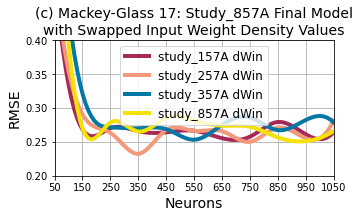

In [765]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo19.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo19.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo19.columns[col], color=colors[col], linewidth = 4)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) Mackey-Glass 17: Study_857A Final Model\nwith Swapped Input Weight Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.4])
plt.grid()
plt.show()

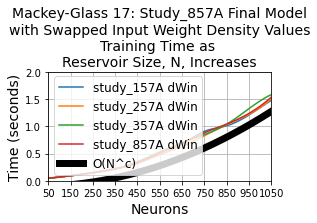

In [766]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo19TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo19TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo19TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Input Weight Density Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

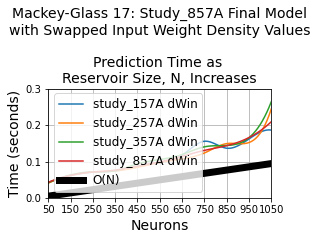

In [767]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo19TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo19TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo19TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Input Weight Density Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [253]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo20= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo20TimeTrain = pd.DataFrame()
plotInfo20TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_157A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_257A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_357A'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
    
    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo20 =            pd.concat((plotInfo20, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo20TimeTrain =   pd.concat((plotInfo20TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo20TimePredict = pd.concat((plotInfo20TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_157A
study_257A
study_357A
study_857A


In [254]:
plotInfo20 =            plotInfo20.rename(columns={"0": "study_157A sin", "1": "study_257A sin", "2": "study_357A sin", "3": "study_857A sin"})
plotInfo20TimeTrain =   plotInfo20TimeTrain.rename(columns={"0": "study_157A sin", "1": "study_257A sin", "2": "study_357A sin", "3": "study_857A sin"})
plotInfo20TimePredict = plotInfo20TimePredict.rename(columns={"0": "study_157A sin", "1": "study_257A sin", "2": "study_357A sin", "3": "study_857A sin"})

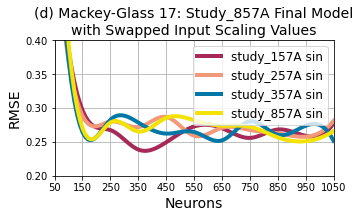

In [742]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo20.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo20.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo20.columns[col], color=colors[col], linewidth=4)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Mackey-Glass 17: Study_857A Final Model\nwith Swapped Input Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.4])
plt.grid()
plt.show()

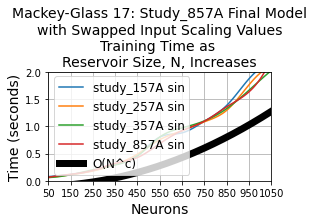

In [256]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo20TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo20TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo20TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Input Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

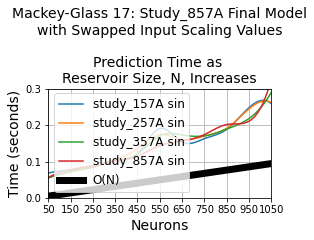

In [257]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo20TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo20TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo20TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Input Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [768]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo21= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo21TimeTrain = pd.DataFrame()
plotInfo21TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_157A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_257A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_357A'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo21 =            pd.concat((plotInfo21, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo21TimeTrain =   pd.concat((plotInfo21TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo21TimePredict = pd.concat((plotInfo21TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_157A
study_257A
study_357A
study_857A


In [769]:
plotInfo21 =            plotInfo21.rename(columns={"0": "study_157A Beta", "1": "study_257A Beta", "2": "study_357A Beta", "3": "study_857A Beta"})
plotInfo21TimeTrain =   plotInfo21TimeTrain.rename(columns={"0": "study_157A Beta", "1": "study_257A Beta", "2": "study_357A Beta", "3": "study_857A Beta"})
plotInfo21TimePredict = plotInfo21TimePredict.rename(columns={"0": "study_157A Beta", "1": "study_257A Beta", "2": "study_357A Beta", "3": "study_857A Beta"})

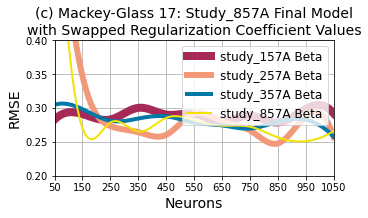

In [783]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
for col in range(0,plotInfo21.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo21.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo21.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) Mackey-Glass 17: Study_857A Final Model\nwith Swapped Regularization Coefficient Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.4])
plt.grid()
plt.show()

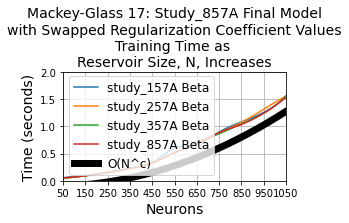

In [771]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo21TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo21TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo21TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

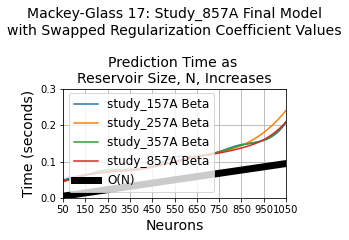

In [782]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo21TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo21TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo21TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Wfb

In [772]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo44= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo44TimeTrain = pd.DataFrame()
plotInfo44TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_157A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_257A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_357A'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dfb = studies.iloc[i,2].params['dfb']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo44 =            pd.concat((plotInfo44, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo44TimeTrain =   pd.concat((plotInfo44TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo44TimePredict = pd.concat((plotInfo44TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_157A
study_257A
study_357A
study_857A


In [773]:
plotInfo44 =            plotInfo44.rename(columns={"0": "study_157A dfb", "1": "study_257A dfb", "2": "study_357A dfb", "3": "study_857A dfb"})
plotInfo44TimeTrain =   plotInfo44TimeTrain.rename(columns={"0": "study_157A dfb", "1": "study_257A dfb", "2": "study_357A dfb", "3": "study_857A dfb"})
plotInfo44TimePredict = plotInfo44TimePredict.rename(columns={"0": "study_157A dfb", "1": "study_257A dfb", "2": "study_357A dfb", "3": "study_857A dfb"})

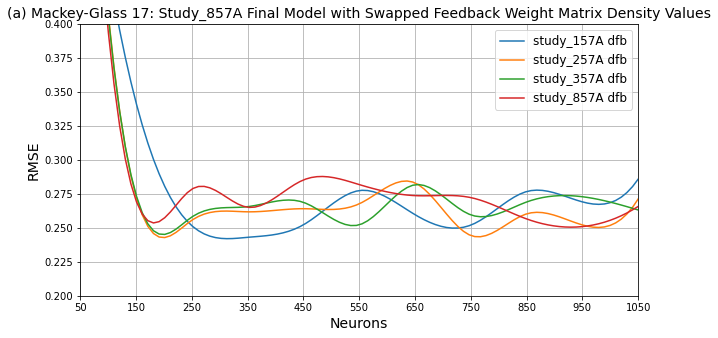

In [774]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo44.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo44.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo44.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Mackey-Glass 17: Study_857A Final Model with Swapped Feedback Weight Matrix Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.4])
plt.grid()
plt.show()

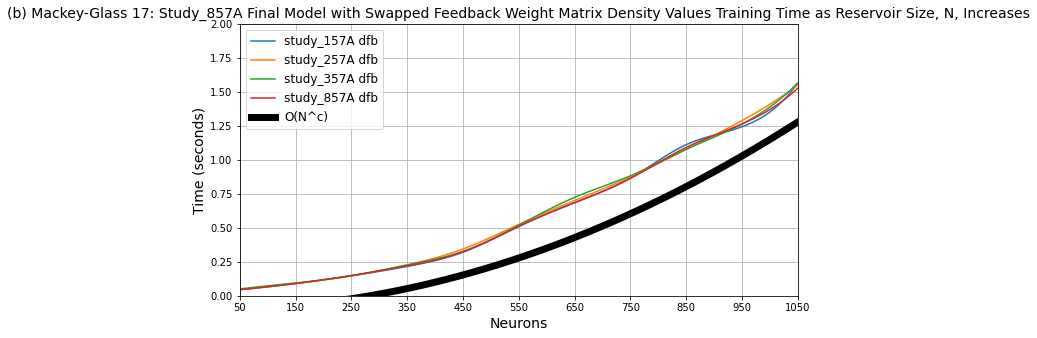

In [775]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo44TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo44TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo44TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey-Glass 17: Study_857A Final Model with Swapped Feedback Weight Matrix Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

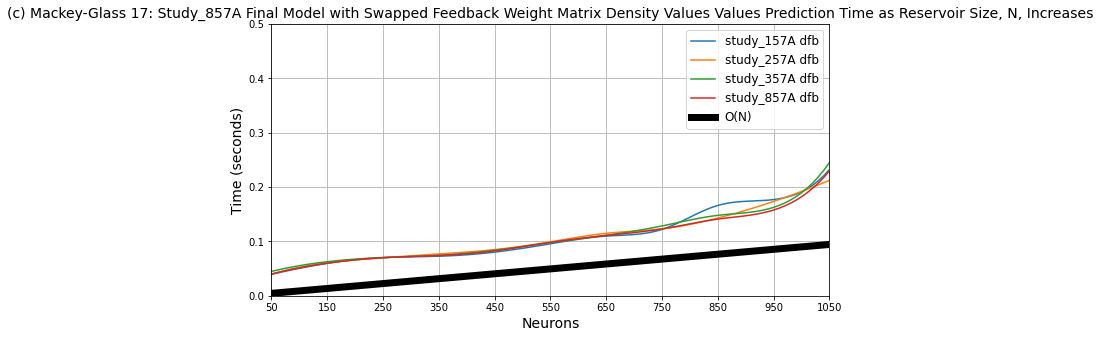

In [776]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo44TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo44TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo44TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17: Study_857A Final Model with Swapped Feedback Weight Matrix Density Values Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Feedback

In [777]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo45= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo45TimeTrain = pd.DataFrame()
plotInfo45TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 4): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_157A'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_257A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_357A'].index[0]
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_857A'].index[0]

    
    print(studies.iloc[i,0])
    sfb = studies.iloc[i,2].params['sfb']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo45 =            pd.concat((plotInfo45, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo45TimeTrain =   pd.concat((plotInfo45TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo45TimePredict = pd.concat((plotInfo45TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_157A
study_257A
study_357A
study_857A


In [778]:
plotInfo45 =            plotInfo45.rename(columns={"0": "study_157A sfb", "1": "study_257A sfb", "2": "study_357A sfb", "3": "study_857A sfb"})
plotInfo45TimeTrain =   plotInfo45TimeTrain.rename(columns={"0": "study_157A sfb", "1": "study_257A sfb", "2": "study_357A sfb", "3": "study_857A sfb"})
plotInfo45TimePredict = plotInfo45TimePredict.rename(columns={"0": "study_157A sfb", "1": "study_257A sfb", "2": "study_357A sfb", "3": "study_857A sfb"})

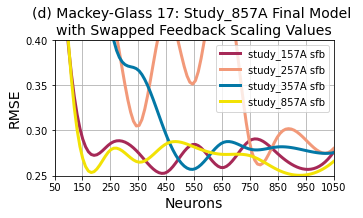

In [798]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo45.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo45.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo45.columns[col], color=colors[col], linewidth=3)

plt.legend()
plt.xlim([50,1050])
plt.title('(d) Mackey-Glass 17: Study_857A Final Model \nwith Swapped Feedback Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.25,0.4])
plt.grid()
plt.show()

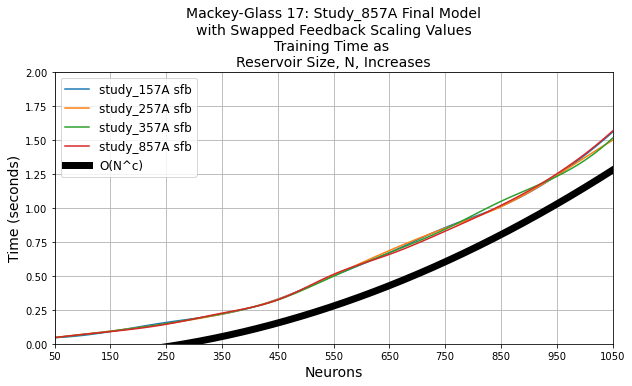

In [780]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo45TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo45TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo45TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Feedback Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

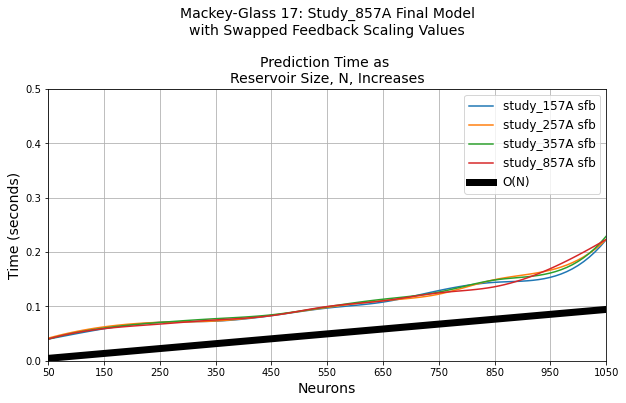

In [781]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo45TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo45TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo45TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: Study_857A Final Model\nwith Swapped Feedback Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

# What readout activation is best?

In [273]:
print(studies.loc[studies.iloc[:,0] == 'study_246B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_246B'].iloc[0,2].params

study_246B


{'p': 0.9170293562318912,
 'a': 0.3975779472084435,
 'dw': 0.30288033876745935,
 'dfb': 0.864372527090096,
 'din': 0.501185053552899,
 'sin': 1.1608812775758415,
 'sfb': 1.9308750260453031,
 'B': 9.617049437278911e-09}

In [274]:
print(studies.loc[studies.iloc[:,0] == 'study_247B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_247B'].iloc[0,2].params

study_247B


{'p': 0.8378701033963081,
 'a': 0.20031343625871822,
 'dw': 0.17069864486608977,
 'dfb': 0.5003661645248476,
 'din': 0.2543342079553447,
 'sin': 0.4982596731051697,
 'sfb': 1.578269374846836,
 'B': 5.619218425978607e-09}

## Models that scored very similar, but used different readout function

In [800]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo14 = pd.DataFrame()
plotInfo14TimeTrain = pd.DataFrame()
plotInfo14TimePredict = pd.DataFrame()
for c in range(0,2): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo14 = pd.concat((plotInfo14, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo14TimeTrain = pd.concat((plotInfo14TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo14TimePredict = pd.concat((plotInfo14TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

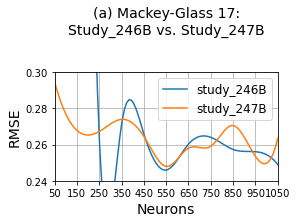

In [801]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Mackey-Glass 17:\nStudy_246B vs. Study_247B\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.24,0.3])
plt.grid()
plt.show()

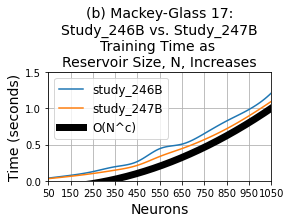

In [807]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey-Glass 17:\nStudy_246B vs. Study_247B\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

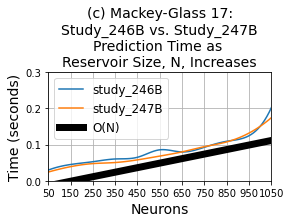

In [811]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.000125*n)-0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17:\nStudy_246B vs. Study_247B\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## Same exact model with different activation function

In [279]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo15 = pd.DataFrame()
plotInfo15TimeTrain = pd.DataFrame()
plotInfo15TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
print('Parameters from ', str(studies.iloc[i,0]))
while(count < 2): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = count
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo15 = pd.concat((plotInfo15, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo15TimeTrain = pd.concat((plotInfo15TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo15TimePredict = pd.concat((plotInfo15TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

Parameters from  study_246B


In [280]:
plotInfo15 = plotInfo15.rename(columns={"0": "study_246B", "1": "study_247B"})
plotInfo15TimeTrain = plotInfo15TimeTrain.rename(columns={"0": "study_246B", "1": "study_247B"})
plotInfo15TimePredict = plotInfo15TimePredict.rename(columns={"0": "study_246B", "1": "study_247B"})

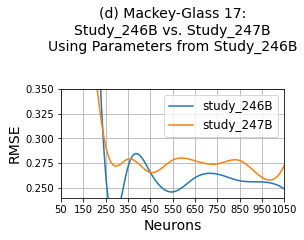

In [812]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Mackey-Glass 17:\nStudy_246B vs. Study_247B\nUsing Parameters from Study_246B\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.24,0.35])
plt.grid()
plt.show()

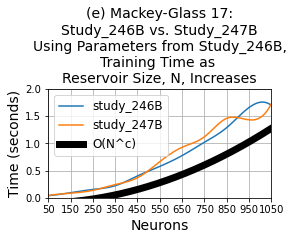

In [282]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) Mackey-Glass 17:\nStudy_246B vs. Study_247B\nUsing Parameters from Study_246B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

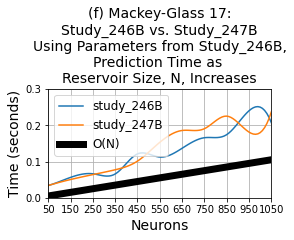

In [283]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Mackey-Glass 17:\nStudy_246B vs. Study_247B\nUsing Parameters from Study_246B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [824]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo61 = pd.DataFrame()
plotInfo61TimeTrain = pd.DataFrame()
plotInfo61TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
print('Parameters from ', str(studies.iloc[i,0]))
while(count < 2): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = count
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo61 = pd.concat((plotInfo61, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo61TimeTrain = pd.concat((plotInfo61TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo61TimePredict = pd.concat((plotInfo61TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

Parameters from  study_247B


In [825]:
plotInfo61 =            plotInfo61.rename(columns={"0": "study_246B", "1": "study_247B"})
plotInfo61TimeTrain =   plotInfo61TimeTrain.rename(columns={"0": "study_246B", "1": "study_247B"})
plotInfo61TimePredict = plotInfo61TimePredict.rename(columns={"0": "study_246B", "1": "study_247B"})

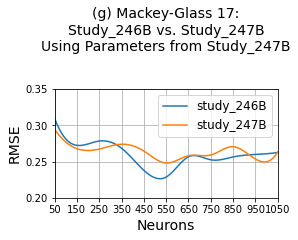

In [826]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo61.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo61.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo61.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(g) Mackey-Glass 17:\nStudy_246B vs. Study_247B\nUsing Parameters from Study_247B\n\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.35])
plt.grid()
plt.show()

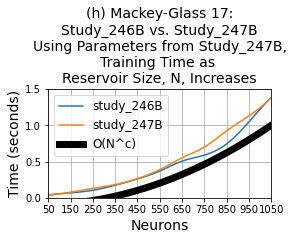

In [829]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo61TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo61TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo61TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Mackey-Glass 17:\nStudy_246B vs. Study_247B\nUsing Parameters from Study_247B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

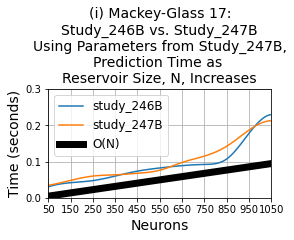

In [828]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo61TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo61TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo61TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Mackey-Glass 17:\nStudy_246B vs. Study_247B\nUsing Parameters from Study_247B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## What parameters influence the function of readout activation?

### spectral radius

In [289]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo47= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo47TimeTrain = pd.DataFrame()
plotInfo47TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    p = studies.iloc[i,2].params['p']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo47 =            pd.concat((plotInfo47, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo47TimeTrain =   pd.concat((plotInfo47TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo47TimePredict = pd.concat((plotInfo47TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_246B
study_247B


In [290]:
plotInfo47 =            plotInfo47.rename(columns={"0": "study_246B SR", "1": "study_247B SR"})
plotInfo47TimeTrain =   plotInfo47TimeTrain.rename(columns={"0": "study_246B SR", "1": "study_247B SR"})
plotInfo47TimePredict = plotInfo47TimePredict.rename(columns={"0": "study_246B SR", "1": "study_247B SR"})

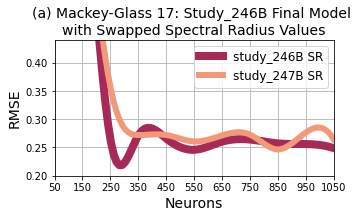

In [819]:
#add to plot
plt.figure(figsize=(5, 2.5))
changeWidth = 8
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo47.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo47.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo47.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Mackey-Glass 17: Study_246B Final Model \nwith Swapped Spectral Radius Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.44])
plt.grid()
plt.show()

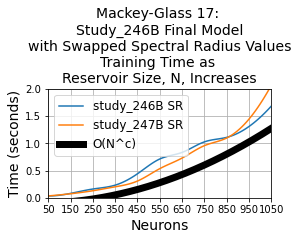

In [292]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo47TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo47TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo47TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Spectral Radius Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

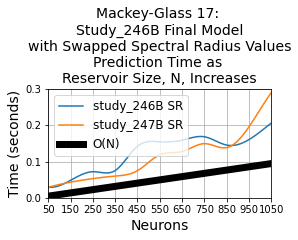

In [293]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo47TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo47TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo47TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Spectral Radius Values\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Leak Rate

In [294]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo48 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo48TimeTrain = pd.DataFrame()
plotInfo48TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    a = studies.iloc[i,2].params['a']
    N=50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(w[j,0])
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo48 =            pd.concat((plotInfo48, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo48TimeTrain =   pd.concat((plotInfo48TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo48TimePredict = pd.concat((plotInfo48TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_246B
study_247B


In [295]:
plotInfo48 =            plotInfo48.rename(columns={"0": "study_246B LR", "1": "study_247B LR"})
plotInfo48TimeTrain =   plotInfo48TimeTrain.rename(columns={"0": "study_246B LR", "1": "study_247B LR"})
plotInfo48TimePredict = plotInfo48TimePredict.rename(columns={"0": "study_246B LR", "1": "study_247B LR"})

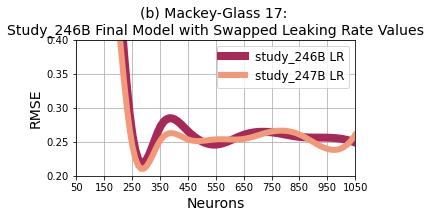

In [823]:
#add to plot
plt.figure(figsize=(5, 2.5))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 8
for col in range(0,plotInfo48.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo48.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo48.columns[col], linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 2

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(b) Mackey-Glass 17: \nStudy_246B Final Model with Swapped Leaking Rate Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.4])
plt.grid()
plt.show()

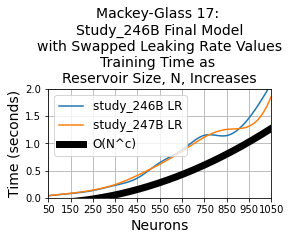

In [297]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo48TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo48TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo48TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Leaking Rate Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

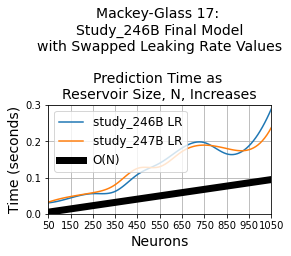

In [298]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo48TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo48TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo48TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Leaking Rate Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of W

In [880]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo49= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo49TimeTrain = pd.DataFrame()
plotInfo49TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    
    print(studies.iloc[i,0])
    N = 50
    dw = studies.iloc[i,2].params['dw']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo49 =            pd.concat((plotInfo49, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo49TimeTrain =   pd.concat((plotInfo49TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo49TimePredict = pd.concat((plotInfo49TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_246B
study_247B


In [881]:
plotInfo49 =            plotInfo49.rename(columns={"0": "study_246B dW", "1": "study_247B dW"})
plotInfo49TimeTrain =   plotInfo49TimeTrain.rename(columns={"0": "study_246B dW", "1": "study_247B dW"})
plotInfo49TimePredict = plotInfo49TimePredict.rename(columns={"0": "study_246B dW", "1": "study_247B dW"})

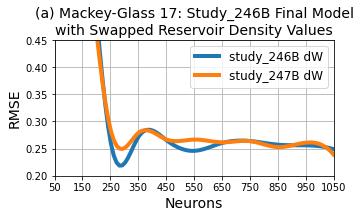

In [913]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo49.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo49.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo49.columns[col], linewidth=4)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(a) Mackey-Glass 17: Study_246B Final Model\nwith Swapped Reservoir Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.45])
plt.grid()
plt.show()

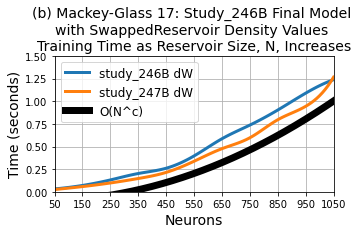

In [916]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo49TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo49TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo49TimeTrain.columns[col], linewidth = 3)
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey-Glass 17: Study_246B Final Model \nwith SwappedReservoir Density Values \nTraining Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

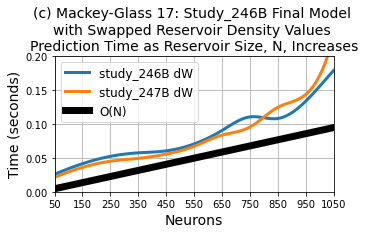

In [919]:
##### add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo49TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo49TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo49TimePredict.columns[col], linewidth=3)
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17: Study_246B Final Model \nwith Swapped Reservoir Density Values \nPrediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Wfb

In [909]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo50= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo50TimeTrain = pd.DataFrame()
plotInfo50TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    N = 50
    dfb = studies.iloc[i,2].params['dfb']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo50 =            pd.concat((plotInfo50, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo50TimeTrain =   pd.concat((plotInfo50TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo50TimePredict = pd.concat((plotInfo50TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_246B
study_247B


In [910]:
plotInfo50 =            plotInfo50.rename(columns={"0": "study_246B dfb", "1": "study_247B dfb"})
plotInfo50TimeTrain =   plotInfo50TimeTrain.rename(columns={"0": "study_246B dfb", "1": "study_247B dfb"})
plotInfo50TimePredict = plotInfo50TimePredict.rename(columns={"0": "study_246B dfb", "1": "study_247B dfb"})

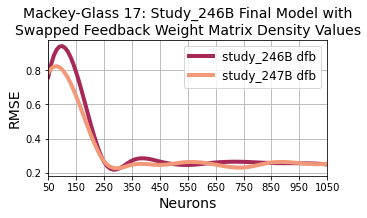

In [911]:
#add to plot
plt.figure(figsize=(5, 2.5))
for col in range(0,plotInfo50.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo50.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo50.columns[col], color=colors[col], linewidth=4)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('Mackey-Glass 17: Study_246B Final Model with\nSwapped Feedback Weight Matrix Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
#plt.ylim([0.2,0.45])
plt.grid()
plt.show()

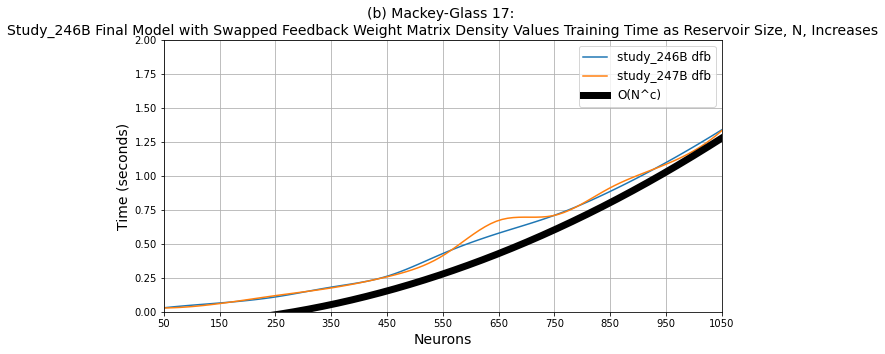

In [888]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo50TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo50TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo50TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Mackey-Glass 17: \nStudy_246B Final Model with Swapped Feedback Weight Matrix Density Values Training Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

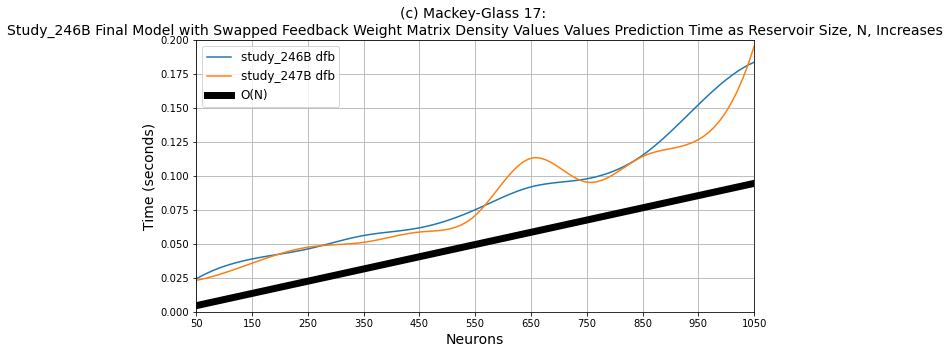

In [889]:
##### add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo50TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo50TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo50TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Mackey-Glass 17: \nStudy_246B Final Model with Swapped Feedback Weight Matrix Density Values Values Prediction Time as Reservoir Size, N, Increases', fontsize=14)
plt.show()

### Density of Win

In [890]:
#Unchanging Parameters
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo51= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo51TimeTrain = pd.DataFrame()
plotInfo51TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    din = studies.iloc[i,2].params['din']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo51 =            pd.concat((plotInfo51, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo51TimeTrain =   pd.concat((plotInfo51TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo51TimePredict = pd.concat((plotInfo51TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_246B
study_247B


In [891]:
plotInfo51 =            plotInfo51.rename(columns={"0": "study_246B dWin", "1": "study_247B dWin"})
plotInfo51TimeTrain =   plotInfo51TimeTrain.rename(columns={"0": "study_246B dWin", "1": "study_247B dWin"})
plotInfo51TimePredict = plotInfo51TimePredict.rename(columns={"0": "study_246B dWin", "1": "study_247B dWin"})

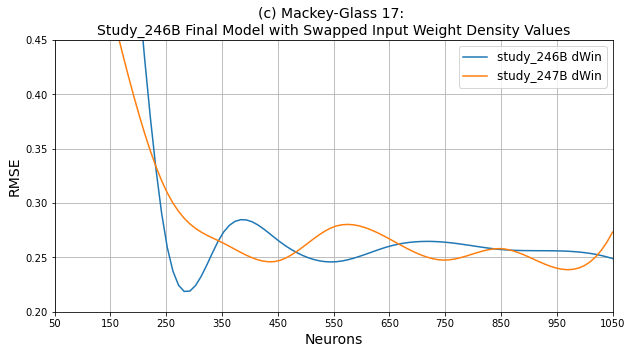

In [892]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo51.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo51.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo51.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(c) Mackey-Glass 17: \nStudy_246B Final Model with Swapped Input Weight Density Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.45])
plt.grid()
plt.show()

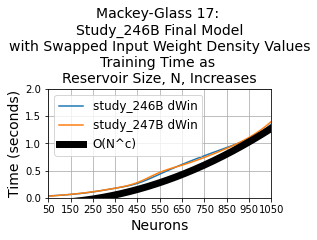

In [893]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo51TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo51TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo51TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Input Weight Density Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

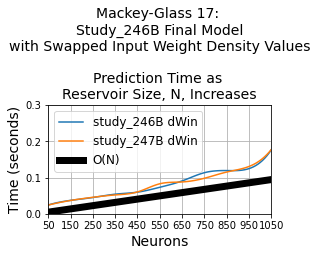

In [894]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo51TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo51TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo51TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Input Weight Density Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Input

In [314]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo52= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo52TimeTrain = pd.DataFrame()
plotInfo52TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]

    print(studies.iloc[i,0])
    sin = studies.iloc[i,2].params['sin']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo52 =            pd.concat((plotInfo52, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo52TimeTrain =   pd.concat((plotInfo52TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo52TimePredict = pd.concat((plotInfo52TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_246B
study_247B


In [315]:
plotInfo52 =            plotInfo52.rename(columns={"0": "study_246B sin", "1": "study_247B sin"})
plotInfo52TimeTrain =   plotInfo52TimeTrain.rename(columns={"0": "study_246B sin", "1": "study_247B sin"})
plotInfo52TimePredict = plotInfo52TimePredict.rename(columns={"0": "study_246B sin", "1": "study_247B sin"})

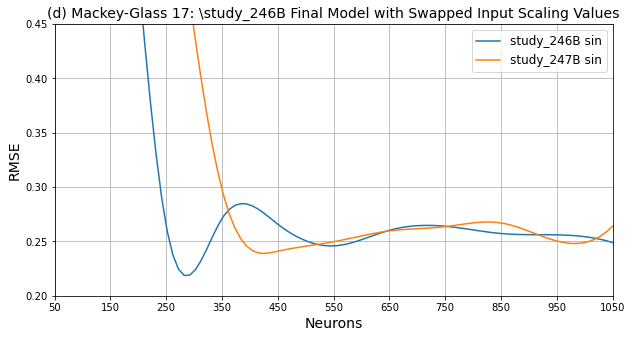

In [839]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo52.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo52.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo52.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Mackey-Glass 17: \study_246B Final Model with Swapped Input Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.45])
plt.grid()
plt.show()

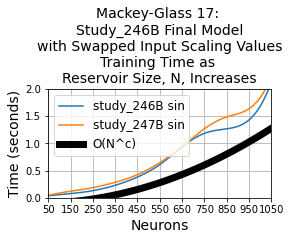

In [317]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo52TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo52TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo52TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Input Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

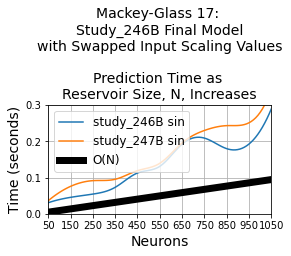

In [318]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo52TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo52TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo52TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Input Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Scaling of Feedback

In [902]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo53= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo53TimeTrain = pd.DataFrame()
plotInfo53TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']

dfb = studies.iloc[i,2].params['dfb']

sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    sfb = studies.iloc[i,2].params['sfb']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo53 =            pd.concat((plotInfo53, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo53TimeTrain =   pd.concat((plotInfo53TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo53TimePredict = pd.concat((plotInfo53TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_246B
study_247B


In [903]:
plotInfo53 =            plotInfo53.rename(columns={"0": "study_246B sfb", "1": "study_247B sfb"})
plotInfo53TimeTrain =   plotInfo53TimeTrain.rename(columns={"0": "study_246B sfb", "1": "study_247B sfb"})
plotInfo53TimePredict = plotInfo53TimePredict.rename(columns={"0": "study_246B sfb", "1": "study_247B sfb"})

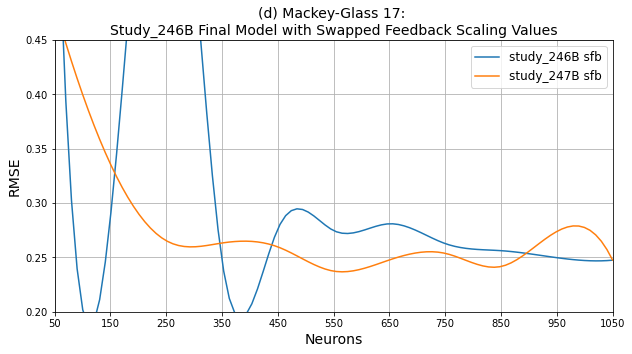

In [904]:
#add to plot
plt.figure(figsize=(10, 5))
for col in range(0,plotInfo53.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo53.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo53.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('(d) Mackey-Glass 17: \nStudy_246B Final Model with Swapped Feedback Scaling Values', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.45])
plt.grid()
plt.show()

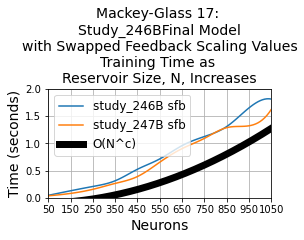

In [322]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo53TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo53TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo53TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: Study_246BFinal Model\nwith Swapped Feedback Scaling Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

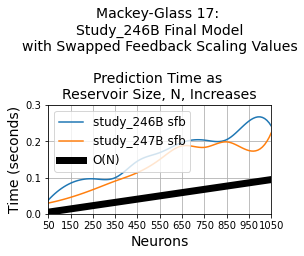

In [323]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo53TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo53TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo53TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Feedback Scaling Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Beta

In [324]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo54= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo54TimeTrain = pd.DataFrame()
plotInfo54TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
p = studies.iloc[i,2].params['p']
a = studies.iloc[i,2].params['a']
dw = studies.iloc[i,2].params['dw']
din = studies.iloc[i,2].params['din']
dfb = studies.iloc[i,2].params['dfb']
sin = studies.iloc[i,2].params['sin']
sfb = studies.iloc[i,2].params['sfb']
B = studies.iloc[i,2].params['B']
isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
resFunc = studies.iloc[i,2].user_attrs['resFunc']
outFunc = studies.iloc[i,2].user_attrs['outFunc']
distribution = studies.iloc[i,2].user_attrs['distribution']
while(count < 2): #Select model param to take
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_247B'].index[0]
    
    print(studies.iloc[i,0])
    B = studies.iloc[i,2].params['B']
    N = 50
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        v = np.random.uniform(-0.01,0.01,(20000, N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testin, transformed)
            scores[k] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo54 =            pd.concat((plotInfo54, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo54TimeTrain =   pd.concat((plotInfo54TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo54TimePredict = pd.concat((plotInfo54TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

study_246B
study_247B


In [325]:
plotInfo54 =            plotInfo54.rename(columns={"0": "study_246B Beta", "1": "study_247B Beta"})
plotInfo54TimeTrain =   plotInfo54TimeTrain.rename(columns={"0": "study_246B Beta", "1": "study_247B Beta"})
plotInfo54TimePredict = plotInfo54TimePredict.rename(columns={"0": "study_846A Beta", "1": "study_247B Beta"})

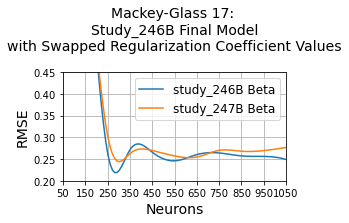

In [841]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo54.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo54.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo54.columns[col])

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Regularization Coefficient Values\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.2,0.45])
plt.grid()
plt.show()

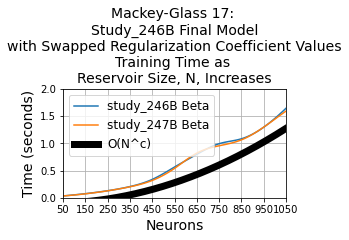

In [327]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo54TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo54TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo54TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)-0.1
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Regularization Coefficient Values\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

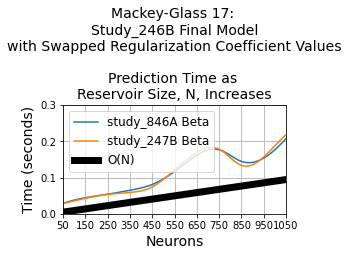

In [328]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo54TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo54TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo54TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.00009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,0.3])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('Mackey-Glass 17: \nStudy_246B Final Model\nwith Swapped Regularization Coefficient Values\n\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()